#Predicao PMC

Este trabalho tem como objetivo a predicao da PMC - Pesquisa Mensal do Comercio . 



In [1]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 4.1 MB/s eta 0:00:00
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0


In [2]:
!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 76.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [3]:
!pip install python-bcb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 10.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1


In [ ]:
!pip install pmdarima
##Solucao https://blog.csdn.net/qq_49821869/article/details/128540436
import os
os.kill(os.getpid(),9)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 55.4 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


#Importando bibliotecas

In [1]:
!pip install sidrapy
import sidrapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from pmdarima import arima
import plotly.express as ploty
from datetime import datetime
from datetime import timedelta
import plotly.express as px
import plotly.graph_objs as go
import random

In [3]:
## testes de aderencia e estacionaridades
#https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [4]:
%matplotlib inline
sns.set(rc={'figure.figsize':(20,10)})

In [5]:
pd.options.display.float_format = '{:.2f}'.format

In [6]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.11.0'

##Biblioteca para deflacionar variavies no Brasil

https://pypi.org/project/deflateBR/

In [7]:
!pip install deflateBR

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 KB 8.8 MB/s eta 0:00:00


In [8]:
import deflatebr as dbr

#Importando dados

In [9]:
inicio = '2000-01-01'

##Importando Pesquisa de Intenção de Consumo das Famílias (ICF) - CNC

In [12]:
import requests
import pandas as pd
import json
from datetime import datetime
import io

# Ler o arquivo JSON usando o método "get" da biblioteca "requests"
url = 'https://portal-backend-prod.azurewebsites.net/wp-json/wp/v2/publicacoes/462947'
response = requests.get(url)

# Carregar o conteúdo do arquivo como um dicionário Python
data = pd.read_json('https://portal-backend-prod.azurewebsites.net/wp-json/wp/v2/publicacoes/?publicacoes_categories=22&filter[orderby]=date&order=desc&search=&page=1&per_page=9')

# Filtrar as publicações com o slug "icf"
icf_publications = data[data['slug'].str.contains('icf')]

# Selecionar a publicação mais recente
icf_publications['date'] = pd.to_datetime(icf_publications['date']).dt.strftime('%Y-%m-%d')
data = icf_publications.sort_values('date', ascending=False)
ultima_data = data.iloc[0]['date']
most_recent_publication = data[data['date'] == ultima_data]

# Acessar a URL do anexo
attachment_url = most_recent_publication['_links'][0]['wp:attachment'][0]['href']
# Ler o arquivo JSON do anexo
attachment_response = requests.get(attachment_url)
attachment_data = json.loads(attachment_response.content)

# Acessar a URL do arquivo xls
xls_url = [d['source_url'] for d in attachment_data if '.xls' in d['source_url']]
xls_url
# Ler o arquivo xls com o Pandas
df = pd.read_excel(xls_url[0], sheet_name='Índices (sem ajuste)')

# Selecionar as colunas "date" e "ICF"
df = df.iloc[:,[0,1]]
df.columns = ['date','ICF']
df.index = df['date']
df_icf = df.drop('date',axis=1)

<ipython-input-12-86befc9dd1e2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icf_publications['date'] = pd.to_datetime(icf_publications['date']).dt.strftime('%Y-%m-%d')


In [11]:
most_recent_publication['_links']

0    {'self': [{'href': 'https://portal-backend-pro...
Name: _links, dtype: object

In [13]:
df_icf

,ICF
date,
2022-02-01,77.56
2022-03-01,78.14
2022-04-01,78.55
2022-05-01,79.46
2022-06-01,80.17
2022-07-01,80.75
2022-08-01,82.13
2022-09-01,84.44
2022-10-01,87.02



##Importando  Pesquisa de Endividamento e Inadimplência do Consumidor (Peic) CNC

In [16]:
# Ler o arquivo JSON usando o método "get" da biblioteca "requests"
url = 'https://portal-backend-prod.azurewebsites.net/wp-json/wp/v2/publicacoes/462947'
response = requests.get(url)

# Carregar o conteúdo do arquivo como um dicionário Python
data = pd.read_json('https://portal-backend-prod.azurewebsites.net/wp-json/wp/v2/publicacoes/?publicacoes_categories=22&filter[orderby]=date&order=desc&search=&page=1&per_page=9')

# Filtrar as publicações com o slug "peic"
peic_publications = data[data['slug'].str.contains('peic')]

# Selecionar a publicação mais recente
peic_publications['date'] = pd.to_datetime(peic_publications['date']).dt.strftime('%Y-%m-%d')
data = peic_publications.sort_values('date', ascending=False)
ultima_data = data.iloc[0]['date']
most_recent_publication = data[data['date'] == ultima_data]

# Acessar a URL do anexo
attachment_url = most_recent_publication['_links'][3]['wp:attachment'][0]['href']
# Ler o arquivo JSON do anexo
attachment_response = requests.get(attachment_url)
attachment_data = json.loads(attachment_response.content)

# Acessar a URL do arquivo xls
xls_url = [d['source_url'] for d in attachment_data if '.xls' in d['source_url']]
xls_url
# Ler o arquivo xls com o Pandas
df = pd.read_excel(xls_url[0], sheet_name='PEIC')

##Tratando os dados
df = df.T
df.columns = df.iloc[0,:]
df = df[1:]
df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')

## selecioanando variaveis
lista= ['Familias Endividadas (% do total de famílias)',
       'Familias com dívidas em atraso (% do total de famílias)',
       'Não terão condição de pagar dívidas em atraso (% do total de famílias)']
df_peic = df.loc[:,lista]
df_peic.index = pd.to_datetime(df_peic.index)
df_peic

<ipython-input-16-d92b3b846c90>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peic_publications['date'] = pd.to_datetime(peic_publications['date']).dt.strftime('%Y-%m-%d')


Unnamed: 0,Familias Endividadas (% do total de famílias),Familias com dívidas em atraso (% do total de famílias),Não terão condição de pagar dívidas em atraso (% do total de famílias)
2022-01-01,0.76,0.26,0.10
2022-02-01,0.77,0.27,0.11
2022-03-01,0.77,0.28,0.11
2022-04-01,0.78,0.29,0.11
2022-05-01,0.77,0.29,0.11
2022-06-01,0.77,0.29,0.11
2022-07-01,0.78,0.29,0.11
2022-08-01,0.79,0.30,0.11
2022-09-01,0.79,0.30,0.11
2022-10-01,0.79,0.30,0.11


In [15]:
most_recent_publication['_links']

3    {'self': [{'href': 'https://portal-backend-pro...
Name: _links, dtype: object

##Indicador de atividade do comercio(Seraza experian)

In [17]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL do site
www_iac = "https://www.serasaexperian.com.br/conteudos/indicadores-economicos/"

# enviar requisição
response = requests.get(www_iac)

# parsear o HTML
soup = BeautifulSoup(response.text, "html.parser")

# obter o link
link = soup.select_one("#main > section > div > div > div > section:nth-of-type(2) > div > div > div > div > div:nth-of-type(1) > div:nth-of-type(1) > div:nth-of-type(2) > a")["href"]

# ler o arquivo
df_atividade = pd.read_excel(link, sheet_name="Com Ajuste Sazonal",skiprows=2)

# remover linhas com valores faltantes
df_atividade.dropna(axis=0,inplace=True)

# Tratando os dados
df_atividade.rename(columns= {'Mês':'ano'},inplace=True) 
df_atividade.index = pd.to_datetime(df_atividade['ano'])
df_atividade.drop('ano',axis=1,inplace=True)

#Selecionando variaveis
df_atividade = df_atividade[['Geral']]
df_atividade

,Geral
ano,
2000-01-01,46.55
2000-02-01,51.33
2000-03-01,47.64
2000-04-01,49.45
2000-05-01,50.71
...,...
2022-08-01,78.87
2022-09-01,79.00
2022-10-01,78.54


##Falências, Recuperações Judiciais e Concordatas - Serasa Experian

In [18]:
# URL do site
www_iac = "https://www.serasaexperian.com.br/conteudos/indicadores-economicos/"

# enviar requisição
response = requests.get(www_iac)

# parsear o HTML
soup = BeautifulSoup(response.text, "html.parser")

# obter o link
link = soup.select_one("#main > section > div > div > div > section:nth-of-type(2) > div > div > div > div > div:nth-of-type(5) > div:nth-of-type(1) > div:nth-of-type(2) > a")["href"]

# ler o arquivo
df_falencia = pd.read_excel(link, sheet_name="Total de Ocorrências Setor",skiprows=4)

# remover linhas com valores faltantes
#df_falencia.dropna(axis=0,inplace=True)

# Tratando os dados
df_falencia.rename(columns= {'Unnamed: 0':'ano'},inplace=True) 
df_falencia.index = pd.to_datetime(df_falencia['ano'])
df_falencia.drop('ano',axis=1,inplace=True)

#Selecionando variaveis
df_falencia = df_falencia[['Comércio']]
df_falencia.dropna(axis=0,inplace=True)
df_falencia


,Comércio
ano,
1991-01-01,0
1991-02-01,0
1991-03-01,0
1991-04-01,0
1991-05-01,0
...,...
2022-08-01,31
2022-09-01,14
2022-10-01,10


##Indicador de Nascimento de Empresas - Serasa Experian

In [19]:
# URL do site
www_iac = "https://www.serasaexperian.com.br/conteudos/indicadores-economicos/"

# enviar requisição
response = requests.get(www_iac)

# parsear o HTML
soup = BeautifulSoup(response.text, "html.parser")

# obter o link
link = soup.select_one("#main > section > div > div > div > section:nth-of-type(2) > div > div > div > div > div:nth-of-type(9) > div:nth-of-type(1) > div:nth-of-type(2) > a")["href"]

# ler o arquivo
df_nascimento = pd.read_excel(link, sheet_name="Qtde. Mensal",skiprows=3)

# Tratando os dados
df_nascimento.rename(columns= {'Mês':'ano'},inplace=True) 
df_nascimento['ano'] = np.where(df_nascimento['ano'] == 'fev-16',pd.to_datetime('2016-02-01'),df_nascimento['ano'])
df_nascimento.index = pd.to_datetime(df_nascimento['ano'])
df_nascimento.drop('ano',axis=1,inplace=True)

#Selecionando variaveis
df_nascimento = df_nascimento[['Comércio']]
df_nascimento

,Comércio
ano,
2010-01-01,25664.00
2010-02-01,36657.00
2010-03-01,50570.00
2010-04-01,41868.00
2010-05-01,48516.00
...,...
2022-08-01,81825.00
2022-09-01,69551.00
2022-10-01,65679.00


##Indicador de Demanda do Consumidor por Crédito - Serasa Experian

In [20]:
# URL do site
www_iac = "https://www.serasaexperian.com.br/conteudos/indicadores-economicos/"

# enviar requisição
response = requests.get(www_iac)

# parsear o HTML
soup = BeautifulSoup(response.text, "html.parser")

# obter o link
link = soup.select_one("#main > section > div > div > div > section:nth-of-type(2) > div > div > div > div > div:nth-of-type(3) > div:nth-of-type(1) > div:nth-of-type(2) > a")["href"]

# ler o arquivo
df_credito = pd.read_excel(link, sheet_name="Consumidor",skiprows=3)

# Tratando os dados
df_credito.rename(columns= {'Mês':'ano'},inplace=True) 
df_credito.index = pd.to_datetime(df_credito['ano'])
df_credito.drop('ano',axis=1,inplace=True)

#Selecionando variaveis
df_credito = df_credito[['Total']]
df_credito

,Total
ano,
2007-01-01,48.34
2007-02-01,43.28
2007-03-01,51.70
2007-04-01,47.16
2007-05-01,52.48
...,...
2022-08-01,106.37
2022-09-01,97.41
2022-10-01,91.33


## Meio de Pagamento - Ampliado - M2 - depósitos em poupança - fim de período (IPEADATA)

In [21]:
#!pip install ipeadatapy
#import ipeadatapy as ip

In [22]:
#Lista das series
#codigos = ip.list_series()

In [23]:
#codigos[codigos.CODE == 'BM12_DEPOUCNY12']

In [24]:
import requests
import pandas as pd

code_ipea = "BM12_DEPOUCNY12"
url = f"http://ipeadata.gov.br/api/odata4/ValoresSerie(SERCODIGO='{code_ipea}')"

response = requests.get(url)
data = response.json()

df_poupanca = pd.DataFrame(data["value"])
df_poupanca = df_poupanca[["VALDATA", "VALVALOR"]]
df_poupanca.rename(columns={"VALDATA": "date", "VALVALOR": "poupanca"}, inplace=True)
df_poupanca['date'] = df_poupanca['date'].apply(lambda x: str(x).split('T')[0])
df_poupanca.index =pd.to_datetime(df_poupanca["date"])
df_poupanca = df_poupanca[['poupanca']]

df_poupanca

,poupanca
date,
1990-01-01,31.48
1990-02-01,41.27
1990-03-01,34.75
1990-04-01,16.54
1990-05-01,10.97
...,...
2022-08-01,10.40
2022-09-01,10.32
2022-10-01,10.19


##Índice Cielo de Varejo Ampliado (ICVA)

In [25]:
df_icva = pd.read_excel('https://apicatalog.mziq.com/filemanager/v2/d/4d1ebe73-b068-4443-992a-3d72d573238c/3e864198-0b72-c970-1771-80cd8c338a30?origin=2',skiprows=6)
df_icva = df_icva.iloc[:4,3:]
df_icva = df_icva.T
df_icva.columns = df_icva.iloc[0,:]
df_icva = df_icva[1:]
df_icva = df_icva[['Deflacionado - Com Ajuste Calendário']]
df_icva.index = pd.to_datetime(df_icva.index)

In [26]:
df_icva

Visão,Deflacionado - Com Ajuste Calendário
2013-01-01,0.07
2013-02-01,0.06
2013-03-01,0.06
2013-04-01,0.07
2013-05-01,0.06
...,...
2021-05-01,0.20
2021-06-01,0.09
2021-07-01,0.06
2021-08-01,0.02


##Importando dados Banco Central



In [27]:
!pip install python-bcb
from bcb import sgs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
date_range = pd.date_range(start=inicio, end=datetime.today(), freq='MS')
date_range

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01'],
              dtype='datetime64[ns]', length=278, freq='MS')

In [29]:
dados_completo = pd.DataFrame(index = date_range)

#### Comprometimento de renda das famílias - Serviço da dívida ex-habit - Com ajuste sazonal

In [30]:
dados_completo['comprometimento_renda'] = sgs.get({'comprometimento_renda':20399})

In [31]:
dados_completo

,comprometimento_renda
2000-01-01,NaN
2000-02-01,NaN
2000-03-01,NaN
2000-04-01,NaN
2000-05-01,NaN
...,...
2022-10-01,NaN
2022-11-01,NaN
2022-12-01,NaN
2023-01-01,NaN


###Consumo de energia elétrica - Comercial

In [32]:
dados_completo['cons_energia_com'] = sgs.get({'cons_energia_com':1402})
dados_completo

,comprometimento_renda,cons_energia_com
2000-01-01,NaN,4083.00
2000-02-01,NaN,4016.00
2000-03-01,NaN,4099.00
2000-04-01,NaN,4065.00
2000-05-01,NaN,3931.00
...,...,...
2022-10-01,NaN,7483.00
2022-11-01,NaN,7721.00
2022-12-01,NaN,NaN
2023-01-01,NaN,NaN


###Dólar americano (venda) - fim de período

In [33]:
dados_completo['cambio'] = sgs.get({'cambio':3696},start=inicio)
dados_completo

,comprometimento_renda,cons_energia_com,cambio
2000-01-01,NaN,4083.00,1.80
2000-02-01,NaN,4016.00,1.77
2000-03-01,NaN,4099.00,1.75
2000-04-01,NaN,4065.00,1.81
2000-05-01,NaN,3931.00,1.83
...,...,...,...
2022-10-01,NaN,7483.00,5.26
2022-11-01,NaN,7721.00,5.29
2022-12-01,NaN,NaN,5.22
2023-01-01,NaN,NaN,5.10


### Endividamento das famílias exceto crédito habitacional

In [34]:
dados_completo['endividamento_exhabit'] = sgs.get({'endividamento_exhabit':20400})
dados_completo

,comprometimento_renda,cons_energia_com,cambio,endividamento_exhabit
2000-01-01,NaN,4083.00,1.80,NaN
2000-02-01,NaN,4016.00,1.77,NaN
2000-03-01,NaN,4099.00,1.75,NaN
2000-04-01,NaN,4065.00,1.81,NaN
2000-05-01,NaN,3931.00,1.83,NaN
...,...,...,...,...
2022-10-01,NaN,7483.00,5.26,NaN
2022-11-01,NaN,7721.00,5.29,NaN
2022-12-01,NaN,NaN,5.22,NaN
2023-01-01,NaN,NaN,5.10,NaN


###Indicador de Movimento de Cheques - Dados dessazonalizados

In [35]:
dados_completo['cheques'] = sgs.get({'cheques':28551})
dados_completo

,comprometimento_renda,cons_energia_com,cambio,endividamento_exhabit,cheques
2000-01-01,NaN,4083.00,1.80,NaN,NaN
2000-02-01,NaN,4016.00,1.77,NaN,NaN
2000-03-01,NaN,4099.00,1.75,NaN,NaN
2000-04-01,NaN,4065.00,1.81,NaN,NaN
2000-05-01,NaN,3931.00,1.83,NaN,NaN
...,...,...,...,...,...
2022-10-01,NaN,7483.00,5.26,NaN,2631856.00
2022-11-01,NaN,7721.00,5.29,NaN,NaN
2022-12-01,NaN,NaN,5.22,NaN,NaN
2023-01-01,NaN,NaN,5.10,NaN,NaN


###Indicador de Movimento do Comércio a Prazo - IMC - Dados dessazonalizados

In [36]:
dados_completo['imc'] = sgs.get({'imc':28550})
dados_completo

,comprometimento_renda,cons_energia_com,cambio,endividamento_exhabit,cheques,imc
2000-01-01,NaN,4083.00,1.80,NaN,NaN,NaN
2000-02-01,NaN,4016.00,1.77,NaN,NaN,NaN
2000-03-01,NaN,4099.00,1.75,NaN,NaN,NaN
2000-04-01,NaN,4065.00,1.81,NaN,NaN,NaN
2000-05-01,NaN,3931.00,1.83,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-10-01,NaN,7483.00,5.26,NaN,2631856.00,1742839.00
2022-11-01,NaN,7721.00,5.29,NaN,NaN,NaN
2022-12-01,NaN,NaN,5.22,NaN,NaN,NaN
2023-01-01,NaN,NaN,5.10,NaN,NaN,NaN


###Índice de Confiança do Consumidor

In [37]:
dados_completo['icc_fecomercio'] = sgs.get({'icc_fecomercio':4393})
dados_completo

,comprometimento_renda,cons_energia_com,cambio,endividamento_exhabit,cheques,imc,icc_fecomercio
2000-01-01,NaN,4083.00,1.80,NaN,NaN,NaN,100.91
2000-02-01,NaN,4016.00,1.77,NaN,NaN,NaN,107.34
2000-03-01,NaN,4099.00,1.75,NaN,NaN,NaN,100.09
2000-04-01,NaN,4065.00,1.81,NaN,NaN,NaN,93.93
2000-05-01,NaN,3931.00,1.83,NaN,NaN,NaN,89.44
...,...,...,...,...,...,...,...
2022-10-01,NaN,7483.00,5.26,NaN,2631856.00,1742839.00,114.23
2022-11-01,NaN,7721.00,5.29,NaN,NaN,NaN,116.79
2022-12-01,NaN,NaN,5.22,NaN,NaN,NaN,122.84
2023-01-01,NaN,NaN,5.10,NaN,NaN,NaN,125.38


###Índice nacional de preços ao consumidor-amplo (IPCA)

In [38]:
dados_completo['ipca'] = sgs.get({'ipca':433})
dados_completo

,comprometimento_renda,cons_energia_com,cambio,endividamento_exhabit,cheques,imc,icc_fecomercio,ipca
2000-01-01,NaN,4083.00,1.80,NaN,NaN,NaN,100.91,0.62
2000-02-01,NaN,4016.00,1.77,NaN,NaN,NaN,107.34,0.13
2000-03-01,NaN,4099.00,1.75,NaN,NaN,NaN,100.09,0.22
2000-04-01,NaN,4065.00,1.81,NaN,NaN,NaN,93.93,0.42
2000-05-01,NaN,3931.00,1.83,NaN,NaN,NaN,89.44,0.01
...,...,...,...,...,...,...,...,...
2022-10-01,NaN,7483.00,5.26,NaN,2631856.00,1742839.00,114.23,0.59
2022-11-01,NaN,7721.00,5.29,NaN,NaN,NaN,116.79,0.41
2022-12-01,NaN,NaN,5.22,NaN,NaN,NaN,122.84,0.62
2023-01-01,NaN,NaN,5.10,NaN,NaN,NaN,125.38,0.53


### Massa Salarial Ampliada Disponível - PNADC (média móvel trimestral)

In [39]:
dados_completo['msad'] = sgs.get({'msad':22079})
dados_completo

,comprometimento_renda,cons_energia_com,cambio,endividamento_exhabit,cheques,imc,icc_fecomercio,ipca,msad
2000-01-01,NaN,4083.00,1.80,NaN,NaN,NaN,100.91,0.62,NaN
2000-02-01,NaN,4016.00,1.77,NaN,NaN,NaN,107.34,0.13,NaN
2000-03-01,NaN,4099.00,1.75,NaN,NaN,NaN,100.09,0.22,NaN
2000-04-01,NaN,4065.00,1.81,NaN,NaN,NaN,93.93,0.42,NaN
2000-05-01,NaN,3931.00,1.83,NaN,NaN,NaN,89.44,0.01,NaN
...,...,...,...,...,...,...,...,...,...
2022-10-01,NaN,7483.00,5.26,NaN,2631856.00,1742839.00,114.23,0.59,NaN
2022-11-01,NaN,7721.00,5.29,NaN,NaN,NaN,116.79,0.41,NaN
2022-12-01,NaN,NaN,5.22,NaN,NaN,NaN,122.84,0.62,NaN
2023-01-01,NaN,NaN,5.10,NaN,NaN,NaN,125.38,0.53,NaN


###Estoque de empregos formais – Comércio – Dados dessazonalizados - CAGED

In [40]:
dados_completo['estoque_empregos_com'] = sgs.get({'estoque_empregos_com':28792})
dados_completo

,comprometimento_renda,cons_energia_com,cambio,endividamento_exhabit,cheques,imc,icc_fecomercio,ipca,msad,estoque_empregos_com
2000-01-01,NaN,4083.00,1.80,NaN,NaN,NaN,100.91,0.62,NaN,3385641.36
2000-02-01,NaN,4016.00,1.77,NaN,NaN,NaN,107.34,0.13,NaN,3397098.93
2000-03-01,NaN,4099.00,1.75,NaN,NaN,NaN,100.09,0.22,NaN,3425390.06
2000-04-01,NaN,4065.00,1.81,NaN,NaN,NaN,93.93,0.42,NaN,3436131.05
2000-05-01,NaN,3931.00,1.83,NaN,NaN,NaN,89.44,0.01,NaN,3444717.86
...,...,...,...,...,...,...,...,...,...,...
2022-10-01,NaN,7483.00,5.26,NaN,2631856.00,1742839.00,114.23,0.59,NaN,9906221.34
2022-11-01,NaN,7721.00,5.29,NaN,NaN,NaN,116.79,0.41,NaN,9931863.43
2022-12-01,NaN,NaN,5.22,NaN,NaN,NaN,122.84,0.62,NaN,9956096.85
2023-01-01,NaN,NaN,5.10,NaN,NaN,NaN,125.38,0.53,NaN,NaN


### Taxa de juros - Selic acumulada no mês anualizada base 


In [41]:
dados_completo['selic'] = sgs.get({'selic':4189})
dados_completo

,comprometimento_renda,cons_energia_com,cambio,endividamento_exhabit,cheques,imc,icc_fecomercio,ipca,msad,estoque_empregos_com,selic
2000-01-01,NaN,4083.00,1.80,NaN,NaN,NaN,100.91,0.62,NaN,3385641.36,18.94
2000-02-01,NaN,4016.00,1.77,NaN,NaN,NaN,107.34,0.13,NaN,3397098.93,18.87
2000-03-01,NaN,4099.00,1.75,NaN,NaN,NaN,100.09,0.22,NaN,3425390.06,18.85
2000-04-01,NaN,4065.00,1.81,NaN,NaN,NaN,93.93,0.42,NaN,3436131.05,18.62
2000-05-01,NaN,3931.00,1.83,NaN,NaN,NaN,89.44,0.01,NaN,3444717.86,18.51
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,NaN,7483.00,5.26,NaN,2631856.00,1742839.00,114.23,0.59,NaN,9906221.34,13.65
2022-11-01,NaN,7721.00,5.29,NaN,NaN,NaN,116.79,0.41,NaN,9931863.43,13.65
2022-12-01,NaN,NaN,5.22,NaN,NaN,NaN,122.84,0.62,NaN,9956096.85,13.65
2023-01-01,NaN,NaN,5.10,NaN,NaN,NaN,125.38,0.53,NaN,NaN,13.65


###Tx. méd. mensal de juros das op. de créd. com rec. livres - PF - Crédito pessoal total

In [42]:
dados_completo['juros_cred_livre_pf'] = sgs.get({'juros_cred_livre_pf':25470})
dados_completo

,comprometimento_renda,cons_energia_com,cambio,endividamento_exhabit,cheques,imc,icc_fecomercio,ipca,msad,estoque_empregos_com,selic,juros_cred_livre_pf
2000-01-01,NaN,4083.00,1.80,NaN,NaN,NaN,100.91,0.62,NaN,3385641.36,18.94,4.80
2000-02-01,NaN,4016.00,1.77,NaN,NaN,NaN,107.34,0.13,NaN,3397098.93,18.87,4.85
2000-03-01,NaN,4099.00,1.75,NaN,NaN,NaN,100.09,0.22,NaN,3425390.06,18.85,4.47
2000-04-01,NaN,4065.00,1.81,NaN,NaN,NaN,93.93,0.42,NaN,3436131.05,18.62,4.42
2000-05-01,NaN,3931.00,1.83,NaN,NaN,NaN,89.44,0.01,NaN,3444717.86,18.51,4.35
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,NaN,7483.00,5.26,NaN,2631856.00,1742839.00,114.23,0.59,NaN,9906221.34,13.65,2.99
2022-11-01,NaN,7721.00,5.29,NaN,NaN,NaN,116.79,0.41,NaN,9931863.43,13.65,2.96
2022-12-01,NaN,NaN,5.22,NaN,NaN,NaN,122.84,0.62,NaN,9956096.85,13.65,2.90
2023-01-01,NaN,NaN,5.10,NaN,NaN,NaN,125.38,0.53,NaN,NaN,13.65,NaN


## PMC ampliado - Índice de volume de vendas - com e sem ajuste sazonal
pmc = #ttps://apisidra.ibge.gov.br/values/t/8186/n1/all/v/11706,11707/p/all/c11046/56736/d/v11706%205,v11707%205

https://sidra.ibge.gov.br/tabela/8186

    

In [43]:
#!pip install sidrapy
#import sidrapy

In [44]:
#t/8186/n1/all/v/11706,11707/p/all/c11046/all/d/v11706%205,v11707%205

In [45]:
url_sazonal = "https://sidra.ibge.gov.br/geratabela?format=xlsx&name=tabela8186.xlsx&terr=N&rank=-&query=t/8186/n1/all/v/11706/p/all/c11046/56736/d/v11706%205/l/v,p%2Bc11046,t"
url_com_ajuste = "https://sidra.ibge.gov.br/geratabela?format=xlsx&name=tabela8186.xlsx&terr=N&rank=-&query=t/8186/n1/all/v/11707/p/all/c11046/56736/d/v11707%205/l/v,p%2Bc11046,t"
df_sazonal = pd.read_excel(url_sazonal,skiprows=3)[:-1]
df_com_ajuste = pd.read_excel(url_com_ajuste,skiprows=3)[:-1]
df_com_ajuste

,Unnamed: 0,janeiro 2003,fevereiro 2003,março 2003,abril 2003,maio 2003,junho 2003,julho 2003,agosto 2003,setembro 2003,...,março 2022,abril 2022,maio 2022,junho 2022,julho 2022,agosto 2022,setembro 2022,outubro 2022,novembro 2022,dezembro 2022
0,NaN,Índice de volume de vendas no comércio varejis...,Índice de volume de vendas no comércio varejis...,Índice de volume de vendas no comércio varejis...,Índice de volume de vendas no comércio varejis...,Índice de volume de vendas no comércio varejis...,Índice de volume de vendas no comércio varejis...,Índice de volume de vendas no comércio varejis...,Índice de volume de vendas no comércio varejis...,Índice de volume de vendas no comércio varejis...,...,Índice de volume de vendas no comércio varejis...,Índice de volume de vendas no comércio varejis...,Índice de volume de vendas no comércio varejis...,Índice de volume de vendas no comércio varejis...,Índice de volume de vendas no comércio varejis...,Índice de volume de vendas no comércio varejis...,Índice de volume de vendas no comércio varejis...,Índice de volume de vendas no comércio varejis...,Índice de volume de vendas no comércio varejis...,Índice de volume de vendas no comércio varejis...
1,Brasil,45.76,46.93,45.79,45.67,45.20,45.60,46.23,46.48,47.32,...,97.85,97.48,98.36,95.99,95.66,95.49,96.77,97.03,96.55,96.97


In [46]:
df_com_ajuste = df_com_ajuste.T
df_com_ajuste = df_com_ajuste.iloc[1:,:]
df_sazonal = df_sazonal.T
df_sazonal = df_sazonal.iloc[1:,:]
df.dropna(inplace=True)
df_pmc = pd.DataFrame()
df_pmc['pmc_com_ajuste'] = df_com_ajuste.iloc[:,1]
df_pmc['pmc'] = df_sazonal.iloc[:,1]

In [47]:
df_pmc

,pmc_com_ajuste,pmc
janeiro 2003,45.76,44.34
fevereiro 2003,46.93,42.70
março 2003,45.79,42.79
abril 2003,45.67,43.70
maio 2003,45.20,45.61
...,...,...
agosto 2022,95.49,98.81
setembro 2022,96.77,95.74
outubro 2022,97.03,97.51
novembro 2022,96.55,101.58


In [48]:
from datetime import datetime

months = {'janeiro': 'january', 'fevereiro': 'february', 'março': 'march',
          'abril': 'april', 'maio': 'may', 'junho': 'june',
          'julho': 'july', 'agosto': 'august', 'setembro': 'september',
          'outubro': 'october', 'novembro': 'november', 'dezembro': 'december'}

lista_data = []
for date in df_pmc.index:
    date_components = date.split(' ')
    formatted_month = months[date_components[0].lower()].capitalize()
    formatted_date = f"{formatted_month} {date_components[1]}"
    date_object = datetime.strptime(formatted_date, '%B %Y')
    lista_data.append(date_object.strftime('%Y-%m-%d'))
df_pmc.index = lista_data

In [49]:
df_pmc.index = pd.to_datetime(df_pmc.index)

In [50]:
df_pmc

,pmc_com_ajuste,pmc
2003-01-01,45.76,44.34
2003-02-01,46.93,42.70
2003-03-01,45.79,42.79
2003-04-01,45.67,43.70
2003-05-01,45.20,45.61
...,...,...
2022-08-01,95.49,98.81
2022-09-01,96.77,95.74
2022-10-01,97.03,97.51
2022-11-01,96.55,101.58


In [51]:
df_pmc.index

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', length=240, freq=None)

##Importando dados de expectativa de PIB Total (Focus/BCB)
https://wilsonfreitas.github.io/python-bcb/expectativas.html#bcb.Expectativas

https://analisemacro.com.br/economia/indicadores/como-coletar-dados-do-boletim-focus-com-o-python/

In [52]:
!pip install python-bcb

from bcb import Expectativas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ExpectativasMercadoTop5Anuais: Expectativas de mercado anuais para os indicadores do Top 5

ExpectativasMercadoInstituicoes: Expectativas de mercado informadas pelas instituições credenciadas

ExpectativaMercadoMensais: Expectativas de Mercado Mensais

ExpectativasMercadoInflacao12Meses: Expectativas de mercado para inflação nos próximos 12 meses

ExpectativasMercadoTop5Mensais: Expectativas de mercado mensais para os indicadores do Top 5

ExpectativasMercadoTrimestrais: Expectativas de Mercado Trimestrais

ExpectativasMercadoAnuais: Expectativas de Mercado Anuais

In [53]:
"""# End point
em = Expectativas()
ep = em.get_endpoint('ExpectativasMercadoAnuais')

# Dados do IPCA

ipca_expec = (ep.query()
 .filter(ep.Indicador == 'IPCA')
 .filter(ep.Data >= data_inicio)
 .filter(ep.baseCalculo == '0')
 .select(ep.Indicador, ep.Data, ep.Media, ep.Mediana, ep.DataReferencia)
 .collect()
  )
# Formata a coluna de Data para formato datetime

ipca_expec.index = pd.to_datetime(ipca_expec['Data'], format = '%Y-%m-%d')
ipca_expec"""

"# End point\nem = Expectativas()\nep = em.get_endpoint('ExpectativasMercadoAnuais')\n\n# Dados do IPCA\n\nipca_expec = (ep.query()\n .filter(ep.Indicador == 'IPCA')\n .filter(ep.Data >= data_inicio)\n .filter(ep.baseCalculo == '0')\n .select(ep.Indicador, ep.Data, ep.Media, ep.Mediana, ep.DataReferencia)\n .collect()\n  )\n# Formata a coluna de Data para formato datetime\n\nipca_expec.index = pd.to_datetime(ipca_expec['Data'], format = '%Y-%m-%d')\nipca_expec"

In [54]:
# End point
em = Expectativas()
ep = em.get_endpoint('ExpectativasMercadoTrimestrais')

In [55]:
#Pesquisando a serie
#pib = ep.query().limit(3000000).collect()

In [56]:
# End point
em = Expectativas()
ep = em.get_endpoint('ExpectativasMercadoTrimestrais')

# Dados do IPCA
pib_expec = (ep.query()
 .filter(ep.Indicador == 'PIB Total')
 .filter(ep.baseCalculo == '0')
 .select(ep.Indicador, ep.Data, ep.Media, ep.Mediana, ep.DataReferencia)
 .collect()
  )

In [57]:
pib_expec = pib_expec.loc[:,['Data','Mediana']]

In [58]:
pib_expec.index= pd.to_datetime(pib_expec['Data'])
pib_expec.drop('Data',axis=1,inplace=True)

In [59]:
pib_expec = pib_expec.resample('MS').median()

##Juntando os dados

In [60]:
dados = dados_completo.copy()

In [61]:
dados['icf'] = df_icf['ICF']
dados['atividade'] = df_atividade['Geral']
dados['credito'] = df_credito['Total']
dados['Familias Endividadas (% do total de famílias)'] = df_peic['Familias Endividadas (% do total de famílias)']
dados['falencias'] = df_falencia['Comércio']
dados['nascimento'] = df_nascimento['Comércio']
dados['damanda_credito'] = df_credito['Total']
dados['poupanca'] = df_poupanca['poupanca']
dados['icva'] = df_icva['Deflacionado - Com Ajuste Calendário']
dados['pmc'] = df_pmc['pmc']
dados['pib_expec'] = pib_expec['Mediana']

In [62]:
#Primeira data do pmc
dados = dados[dados['pmc'].index >= '2003-01-01']

#Tratando os dados

In [63]:
dados

,comprometimento_renda,cons_energia_com,cambio,endividamento_exhabit,cheques,imc,icc_fecomercio,ipca,msad,estoque_empregos_com,...,atividade,credito,Familias Endividadas (% do total de famílias),falencias,nascimento,damanda_credito,poupanca,icva,pmc,pib_expec
2003-01-01,NaN,4182.00,3.53,NaN,1826505.00,NaN,102.97,2.25,NaN,4045873.70,...,46.35,NaN,NaN,0.00,NaN,NaN,9.41,NaN,44.34,1.90
2003-02-01,NaN,4153.00,3.56,NaN,1775727.00,NaN,103.53,1.57,NaN,4068558.78,...,49.05,NaN,NaN,0.00,NaN,NaN,9.25,NaN,42.70,1.95
2003-03-01,NaN,4221.00,3.35,NaN,1781840.00,NaN,101.89,1.23,NaN,4082585.40,...,41.96,NaN,NaN,0.00,NaN,NaN,9.05,NaN,42.79,2.00
2003-04-01,NaN,3948.00,2.89,NaN,1797816.00,NaN,107.66,0.97,NaN,4099204.40,...,46.80,NaN,NaN,0.00,NaN,NaN,8.87,NaN,43.70,1.90
2003-05-01,NaN,3938.00,2.97,NaN,1762238.00,NaN,112.04,0.61,NaN,4115164.19,...,45.94,NaN,NaN,0.00,NaN,NaN,8.76,NaN,45.61,1.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,NaN,7483.00,5.26,NaN,2631856.00,1742839.00,114.23,0.59,NaN,9906221.34,...,78.54,91.33,0.79,10.00,65679.00,91.33,10.19,NaN,97.51,1.23
2022-11-01,NaN,7721.00,5.29,NaN,NaN,NaN,116.79,0.41,NaN,9931863.43,...,80.28,87.86,0.79,24.00,NaN,87.86,10.11,NaN,101.58,1.25
2022-12-01,NaN,NaN,5.22,NaN,NaN,NaN,122.84,0.62,NaN,9956096.85,...,81.07,77.28,0.78,10.00,NaN,77.28,10.16,NaN,113.10,1.12
2023-01-01,NaN,NaN,5.10,NaN,NaN,NaN,125.38,0.53,NaN,NaN,...,NaN,NaN,0.78,NaN,NaN,NaN,NaN,NaN,NaN,1.23


In [64]:
dados.isnull().sum()

comprometimento_renda                             44
cons_energia_com                                   3
cambio                                             1
endividamento_exhabit                             42
cheques                                            4
imc                                               16
icc_fecomercio                                     1
ipca                                               1
msad                                              26
estoque_empregos_com                               2
selic                                              0
juros_cred_livre_pf                                2
icf                                              229
atividade                                          2
credito                                           50
Familias Endividadas (% do total de famílias)    229
falencias                                          2
nascimento                                       168
damanda_credito                               

##Deflacionar a Massa Salarial Ampliada

https://pypi.org/project/deflateBR/

In [65]:
!pip install deflateBR

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
import deflatebr as dbr

In [67]:
#Nao deu pra colocar a data de hoje, tem que ser reduzido alguns dias
data_inicio = datetime.today() - timedelta(days=60)
data_inicio= data_inicio.strftime('%Y-%m')

In [68]:
lista_msad = dbr.deflate(nominal_values=dados.msad, nominal_dates=dados.index, 
            real_date=data_inicio,index='inpc')

In [69]:
dados['msad_deflacionado'] = lista_msad

In [70]:
dados.drop('msad',axis=1,inplace=True)

In [71]:
dados

,comprometimento_renda,cons_energia_com,cambio,endividamento_exhabit,cheques,imc,icc_fecomercio,ipca,estoque_empregos_com,selic,...,credito,Familias Endividadas (% do total de famílias),falencias,nascimento,damanda_credito,poupanca,icva,pmc,pib_expec,msad_deflacionado
2003-01-01,NaN,4182.00,3.53,NaN,1826505.00,NaN,102.97,2.25,4045873.70,25.06,...,NaN,NaN,0.00,NaN,NaN,9.41,NaN,44.34,1.90,NaN
2003-02-01,NaN,4153.00,3.56,NaN,1775727.00,NaN,103.53,1.57,4068558.78,25.68,...,NaN,NaN,0.00,NaN,NaN,9.25,NaN,42.70,1.95,NaN
2003-03-01,NaN,4221.00,3.35,NaN,1781840.00,NaN,101.89,1.23,4082585.40,26.32,...,NaN,NaN,0.00,NaN,NaN,9.05,NaN,42.79,2.00,NaN
2003-04-01,NaN,3948.00,2.89,NaN,1797816.00,NaN,107.66,0.97,4099204.40,26.32,...,NaN,NaN,0.00,NaN,NaN,8.87,NaN,43.70,1.90,NaN
2003-05-01,NaN,3938.00,2.97,NaN,1762238.00,NaN,112.04,0.61,4115164.19,26.31,...,NaN,NaN,0.00,NaN,NaN,8.76,NaN,45.61,1.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,NaN,7483.00,5.26,NaN,2631856.00,1742839.00,114.23,0.59,9906221.34,13.65,...,91.33,0.79,10.00,65679.00,91.33,10.19,NaN,97.51,1.23,NaN
2022-11-01,NaN,7721.00,5.29,NaN,NaN,NaN,116.79,0.41,9931863.43,13.65,...,87.86,0.79,24.00,NaN,87.86,10.11,NaN,101.58,1.25,NaN
2022-12-01,NaN,NaN,5.22,NaN,NaN,NaN,122.84,0.62,9956096.85,13.65,...,77.28,0.78,10.00,NaN,77.28,10.16,NaN,113.10,1.12,NaN
2023-01-01,NaN,NaN,5.10,NaN,NaN,NaN,125.38,0.53,NaN,13.65,...,NaN,0.78,NaN,NaN,NaN,NaN,NaN,NaN,1.23,NaN


##Criando dummy Covid para as 2020-04-01 e 2020-05-01

In [72]:
dados['dummy_covid'] = np.where((dados.index >= pd.to_datetime('2020-04-01')) & (dados.index <= pd.to_datetime('2020-05-01')), 1,0)
dados

,comprometimento_renda,cons_energia_com,cambio,endividamento_exhabit,cheques,imc,icc_fecomercio,ipca,estoque_empregos_com,selic,...,Familias Endividadas (% do total de famílias),falencias,nascimento,damanda_credito,poupanca,icva,pmc,pib_expec,msad_deflacionado,dummy_covid
2003-01-01,NaN,4182.00,3.53,NaN,1826505.00,NaN,102.97,2.25,4045873.70,25.06,...,NaN,0.00,NaN,NaN,9.41,NaN,44.34,1.90,NaN,0
2003-02-01,NaN,4153.00,3.56,NaN,1775727.00,NaN,103.53,1.57,4068558.78,25.68,...,NaN,0.00,NaN,NaN,9.25,NaN,42.70,1.95,NaN,0
2003-03-01,NaN,4221.00,3.35,NaN,1781840.00,NaN,101.89,1.23,4082585.40,26.32,...,NaN,0.00,NaN,NaN,9.05,NaN,42.79,2.00,NaN,0
2003-04-01,NaN,3948.00,2.89,NaN,1797816.00,NaN,107.66,0.97,4099204.40,26.32,...,NaN,0.00,NaN,NaN,8.87,NaN,43.70,1.90,NaN,0
2003-05-01,NaN,3938.00,2.97,NaN,1762238.00,NaN,112.04,0.61,4115164.19,26.31,...,NaN,0.00,NaN,NaN,8.76,NaN,45.61,1.90,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,NaN,7483.00,5.26,NaN,2631856.00,1742839.00,114.23,0.59,9906221.34,13.65,...,0.79,10.00,65679.00,91.33,10.19,NaN,97.51,1.23,NaN,0
2022-11-01,NaN,7721.00,5.29,NaN,NaN,NaN,116.79,0.41,9931863.43,13.65,...,0.79,24.00,NaN,87.86,10.11,NaN,101.58,1.25,NaN,0
2022-12-01,NaN,NaN,5.22,NaN,NaN,NaN,122.84,0.62,9956096.85,13.65,...,0.78,10.00,NaN,77.28,10.16,NaN,113.10,1.12,NaN,0
2023-01-01,NaN,NaN,5.10,NaN,NaN,NaN,125.38,0.53,NaN,13.65,...,0.78,NaN,NaN,NaN,NaN,NaN,NaN,1.23,NaN,0


##Fazendo Backcasting nos valores faltantes com arvores de decisao

In [73]:
dados_interpolacao = dados.copy()

In [74]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [75]:
np.random.seed(0)

dados_bac = dados.copy()
for i in dados.columns:
    dados_interpolacao = dados.copy()

    dados_interpolacao = dados_interpolacao.loc[:dados_interpolacao[i].last_valid_index()]


    # Separate values not NaN and NaN in two different dataframes
    treino_interpolacao = dados_interpolacao[dados_interpolacao[i].notnull()]
    predicao_interpolacao = dados_interpolacao[dados_interpolacao[i].isnull()]
  
    # Create Y_treino column and remove from treino_interpolacao
    Y_treino = treino_interpolacao[i]
    treino_interpolacao = treino_interpolacao.drop(i,axis=1)

    predicao_interpolacao = predicao_interpolacao.drop(i,axis=1)
    
    # Remove columns with more than 10 NaN values
    predicao_interpolacao = predicao_interpolacao.dropna(thresh=len(predicao_interpolacao) - 4, axis=1)

    Y_treino = Y_treino[Y_treino.index.isin(treino_interpolacao.index)]

    treino_interpolacao = treino_interpolacao.loc[:, predicao_interpolacao.columns]

   # Fill NaN values in remaining columns with the mean
    treino_interpolacao = treino_interpolacao.fillna(treino_interpolacao.mean())
    predicao_interpolacao = predicao_interpolacao.fillna(predicao_interpolacao.mean())
   # Filter prediction dataframe to include only columns present in training dataframe
   # Create the model
    model = XGBRegressor(random_state=0)
   
   # Train the model
    model.fit(treino_interpolacao.values,Y_treino.values.reshape(-1,1))
    predicao = model.predict(predicao_interpolacao.values)
    interpolados = pd.DataFrame(predicao,index=predicao_interpolacao.index)
    interpolados.columns = [i]
    dados_bac.fillna(interpolados,inplace=True)
    
    


[16:08:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

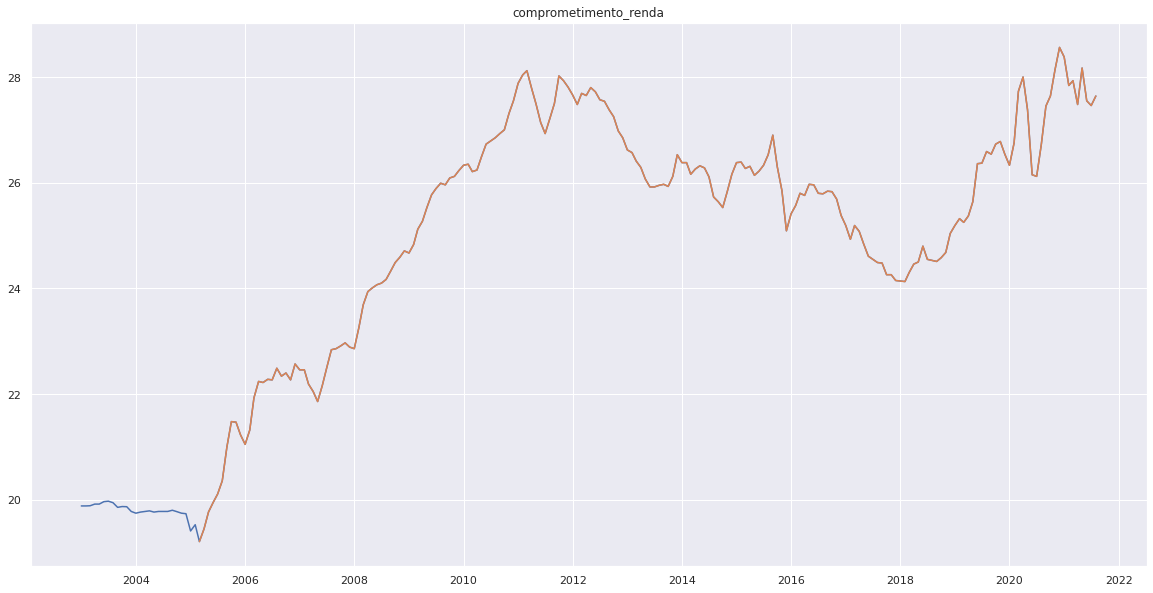

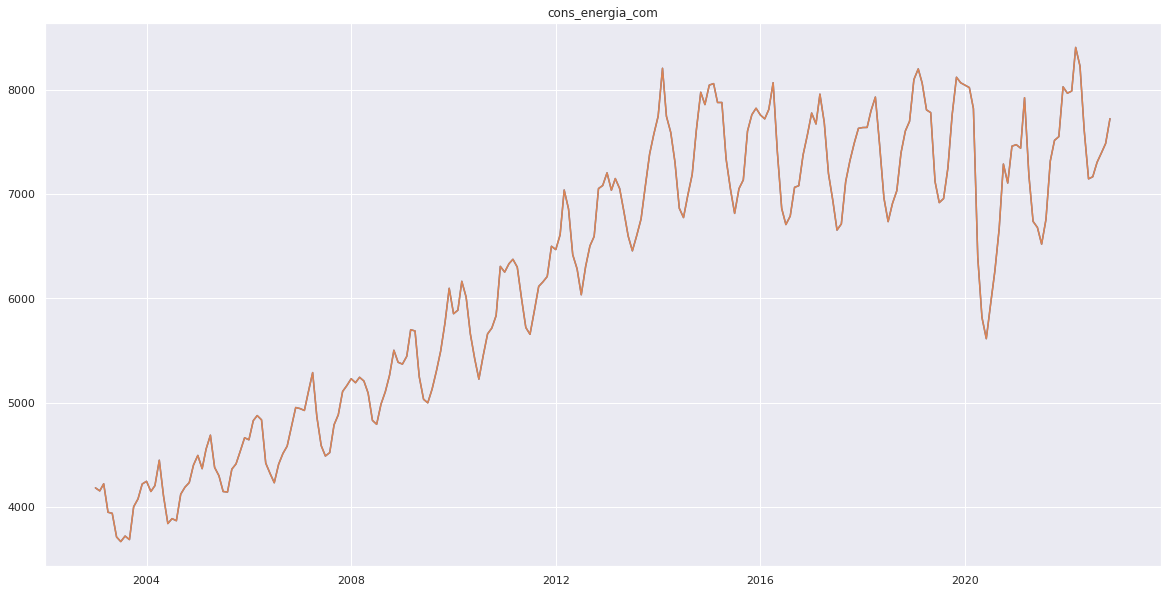

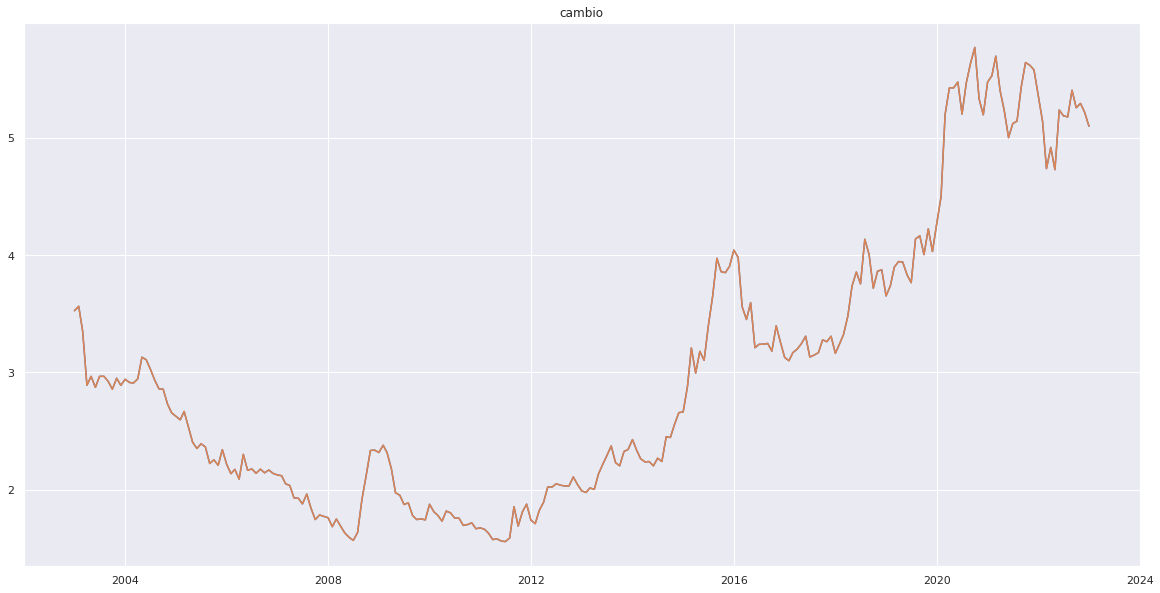

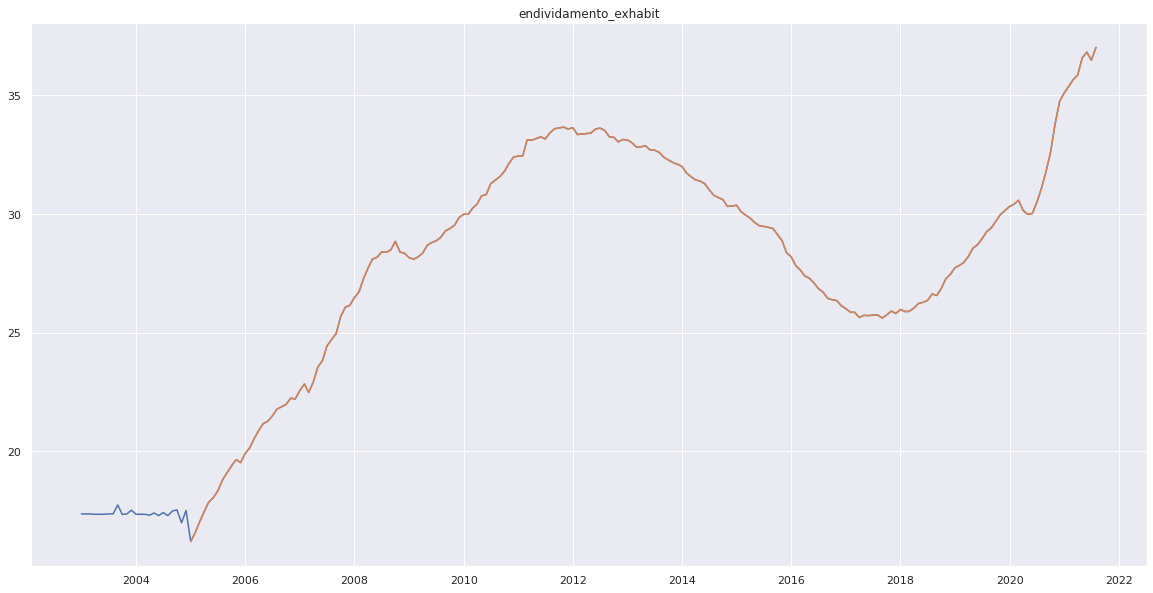

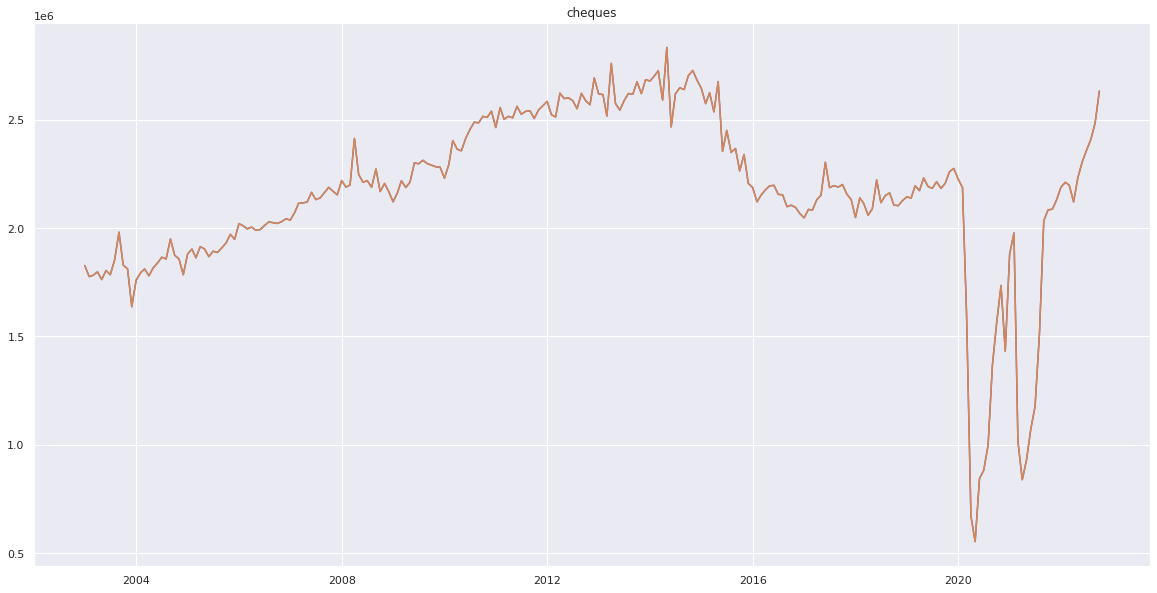

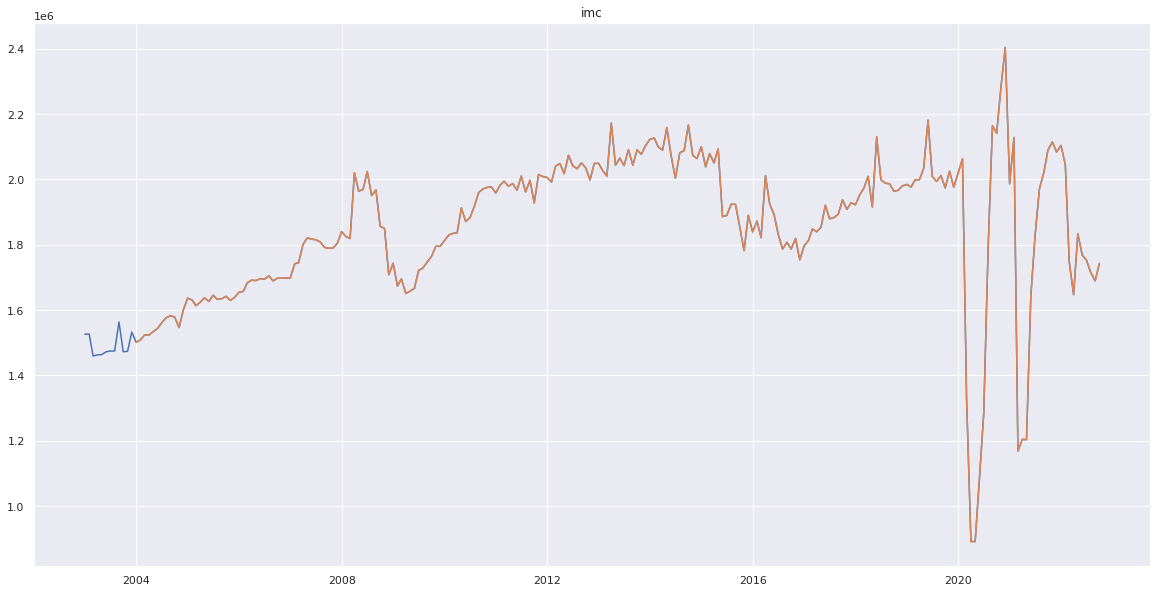

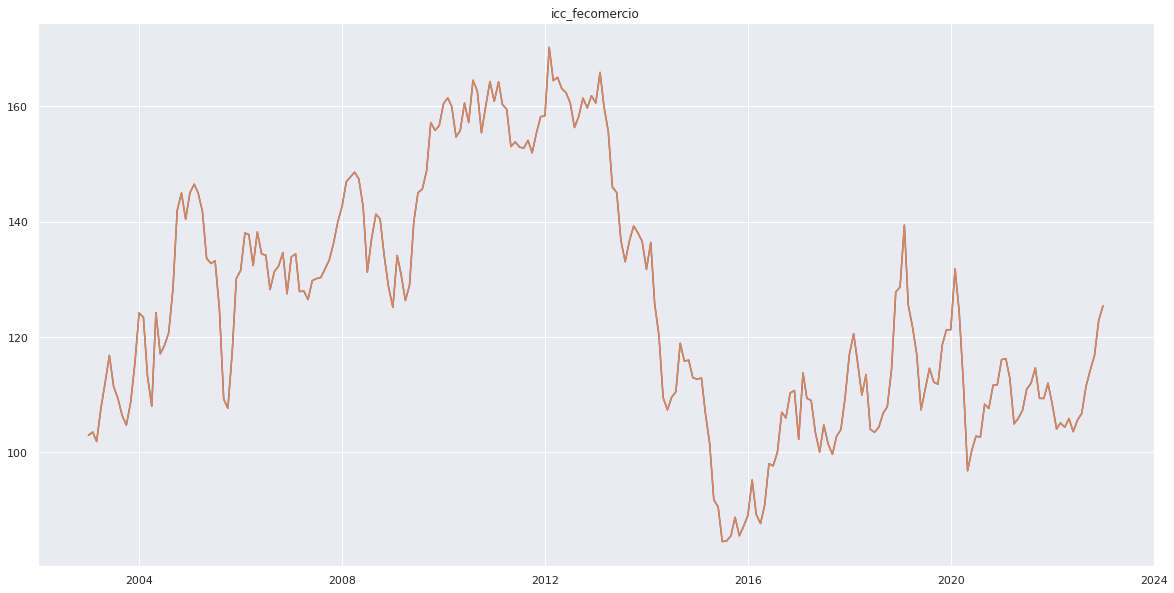

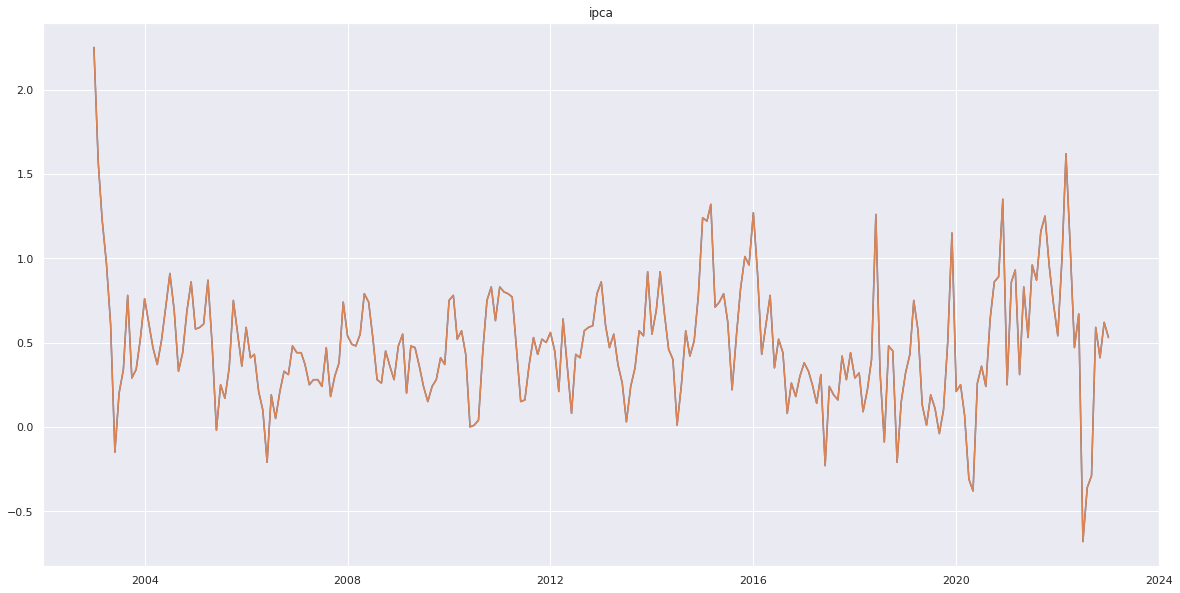

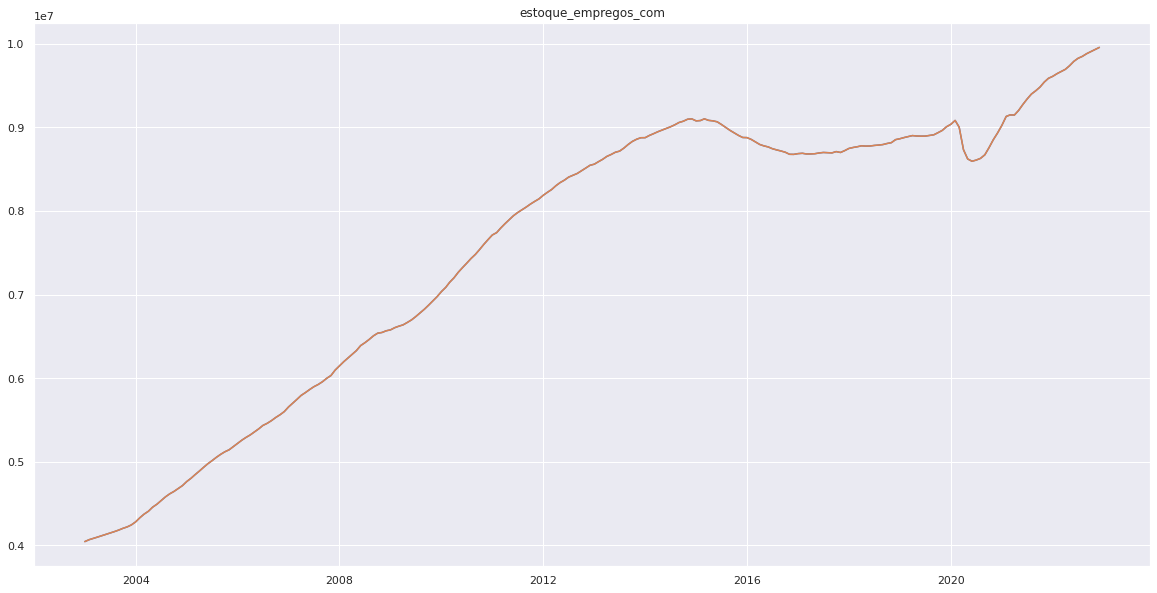

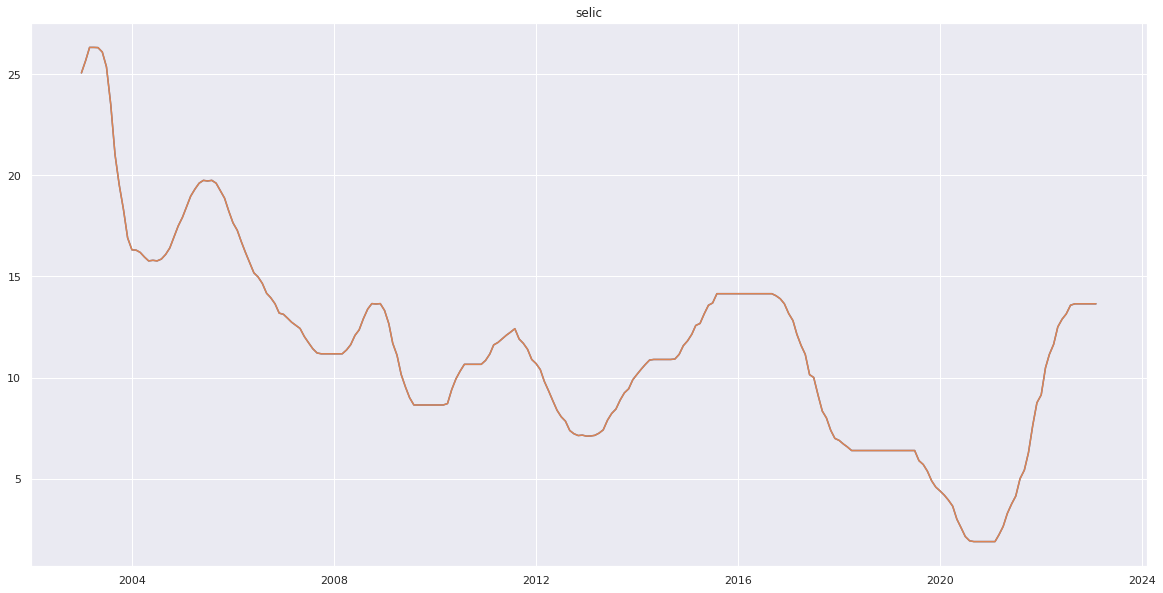

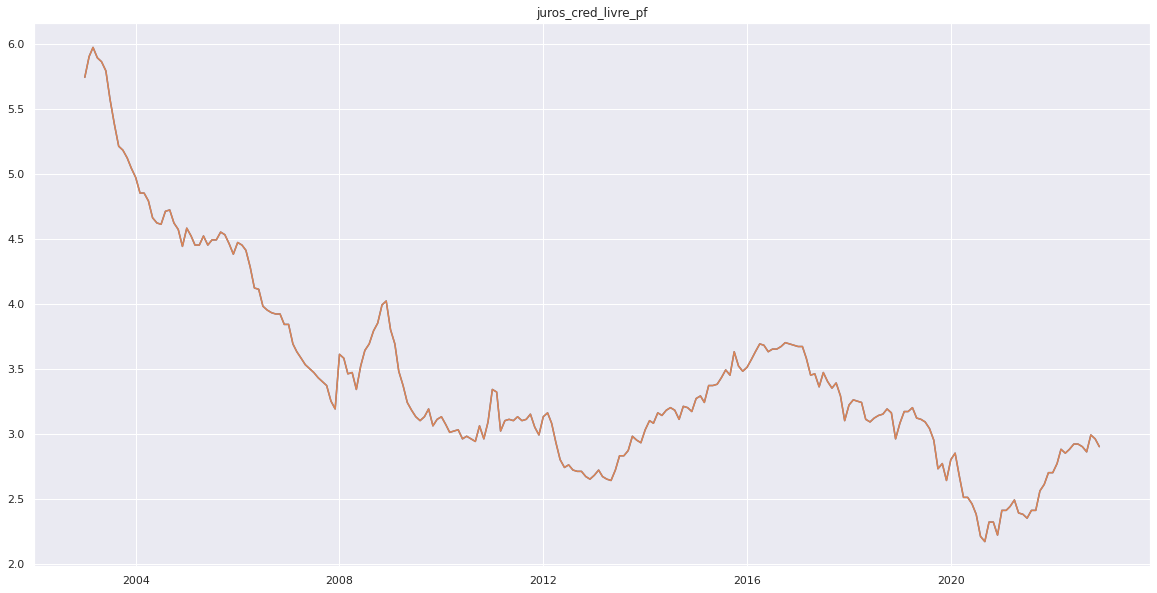

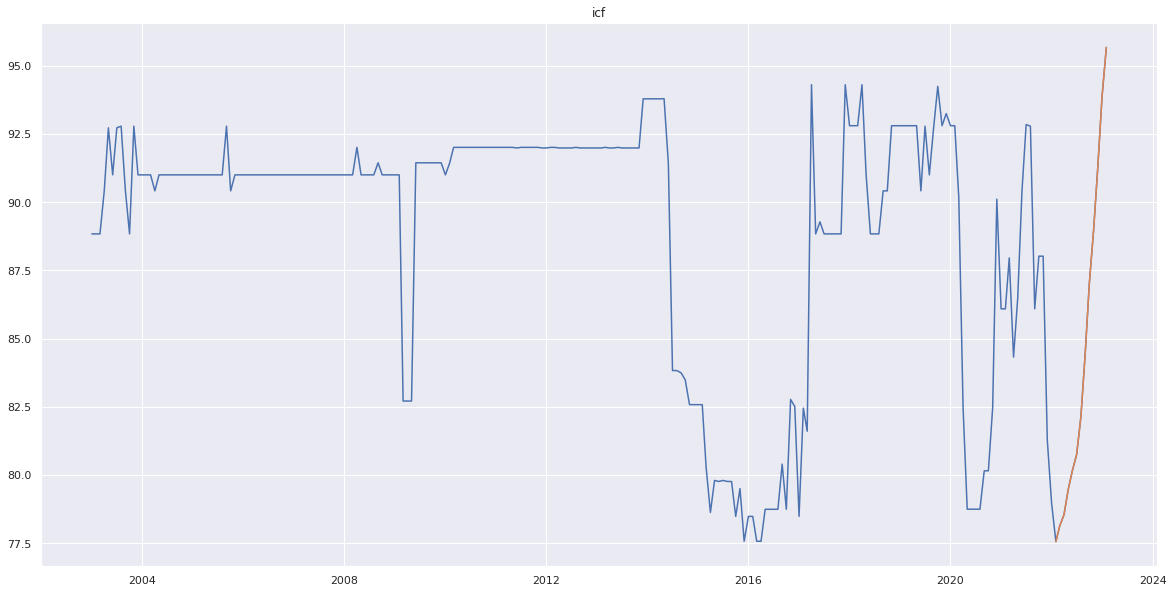

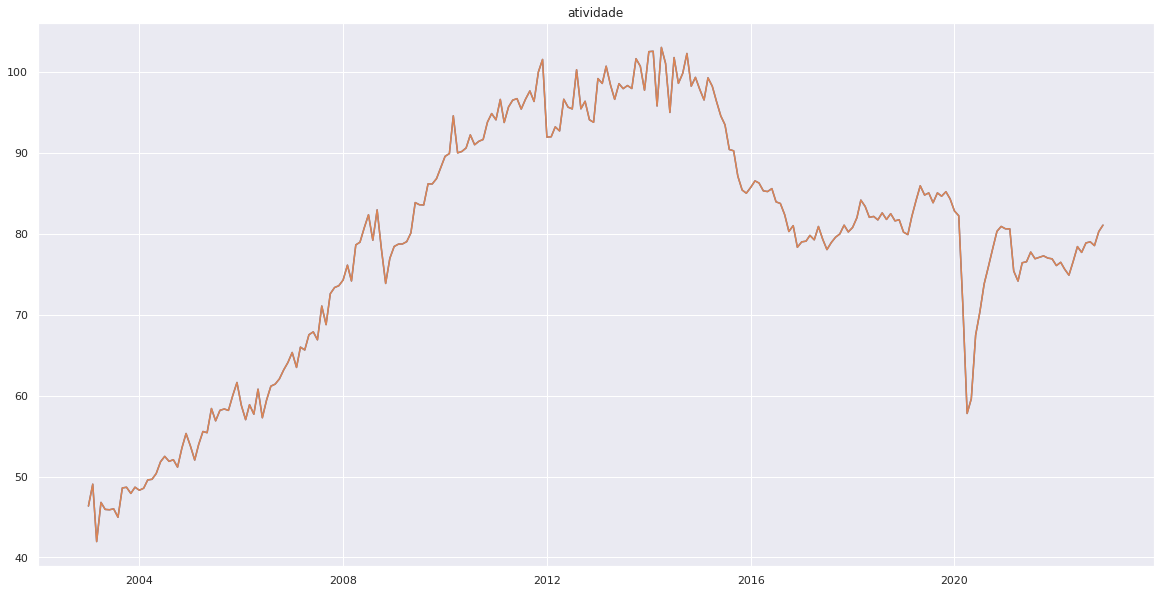

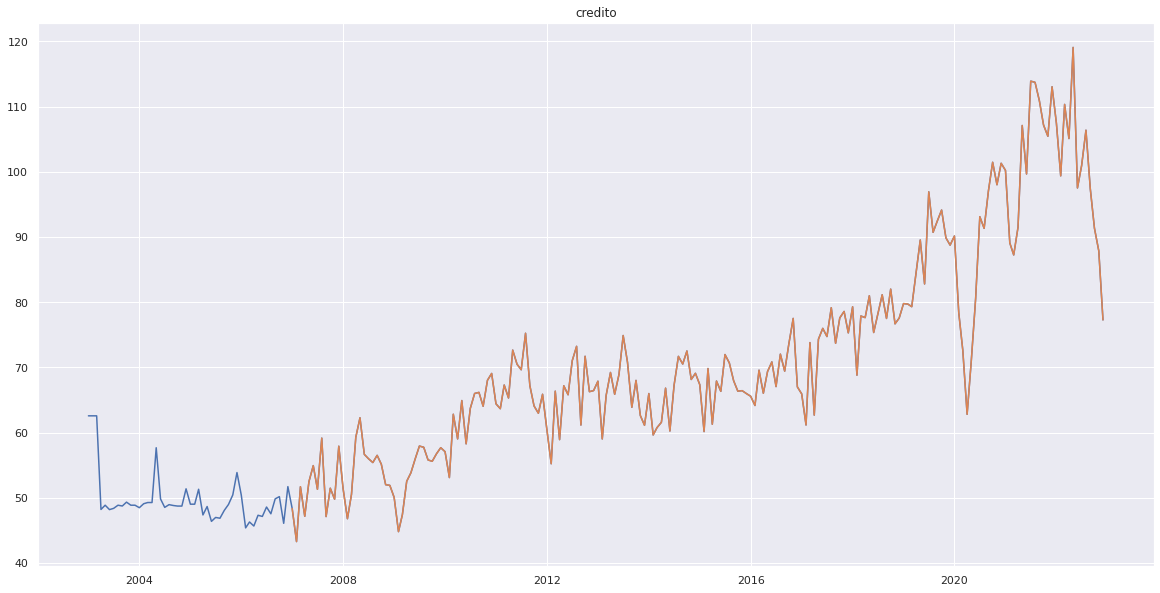

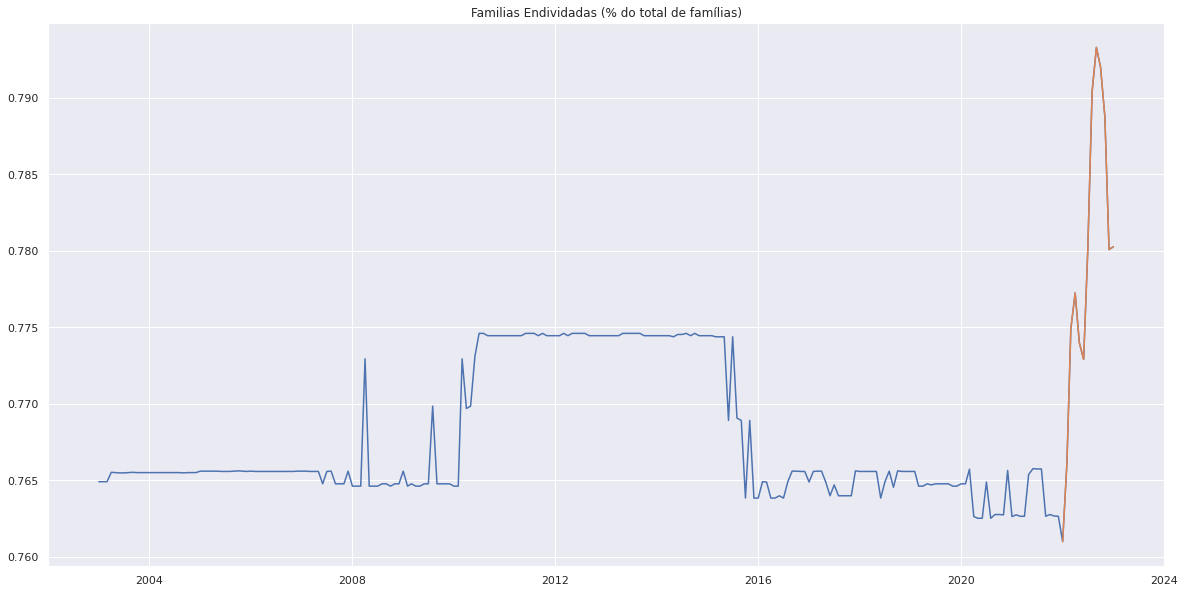

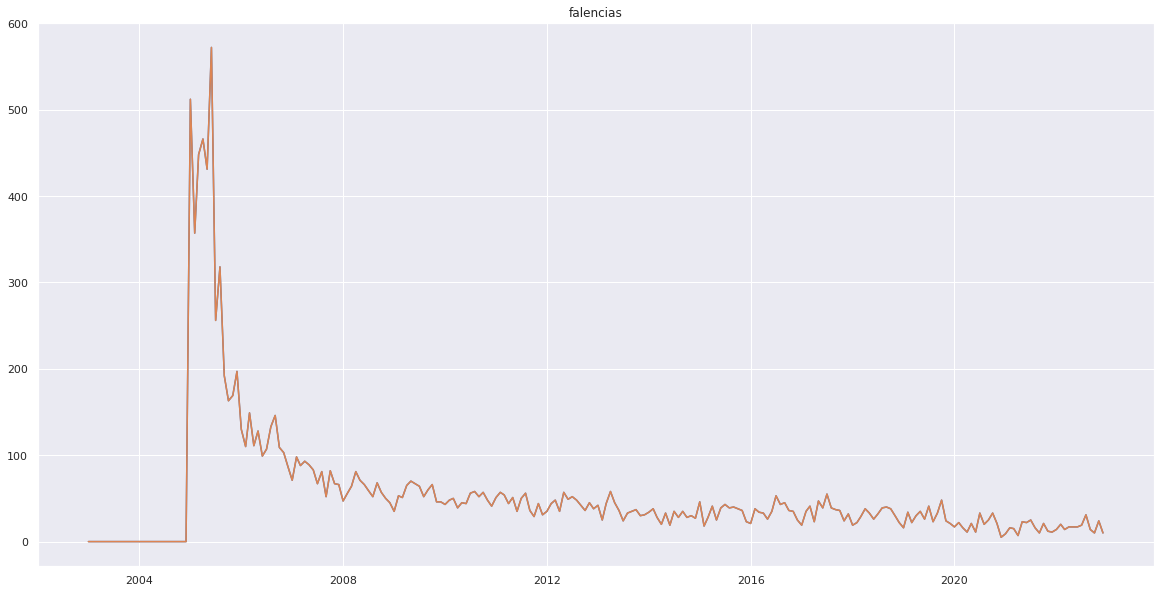

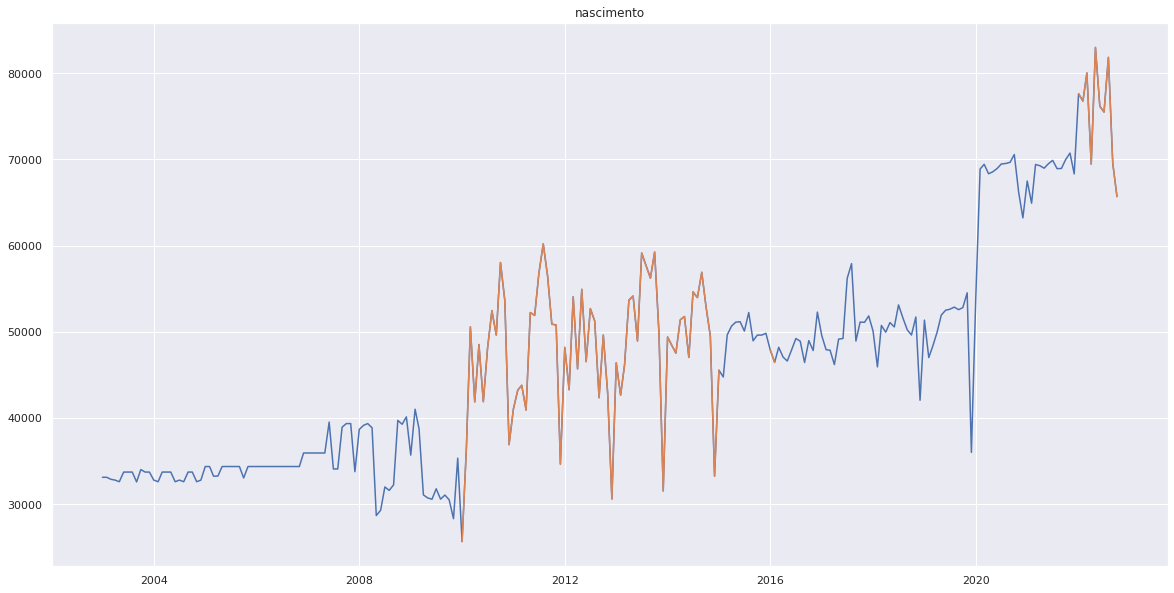

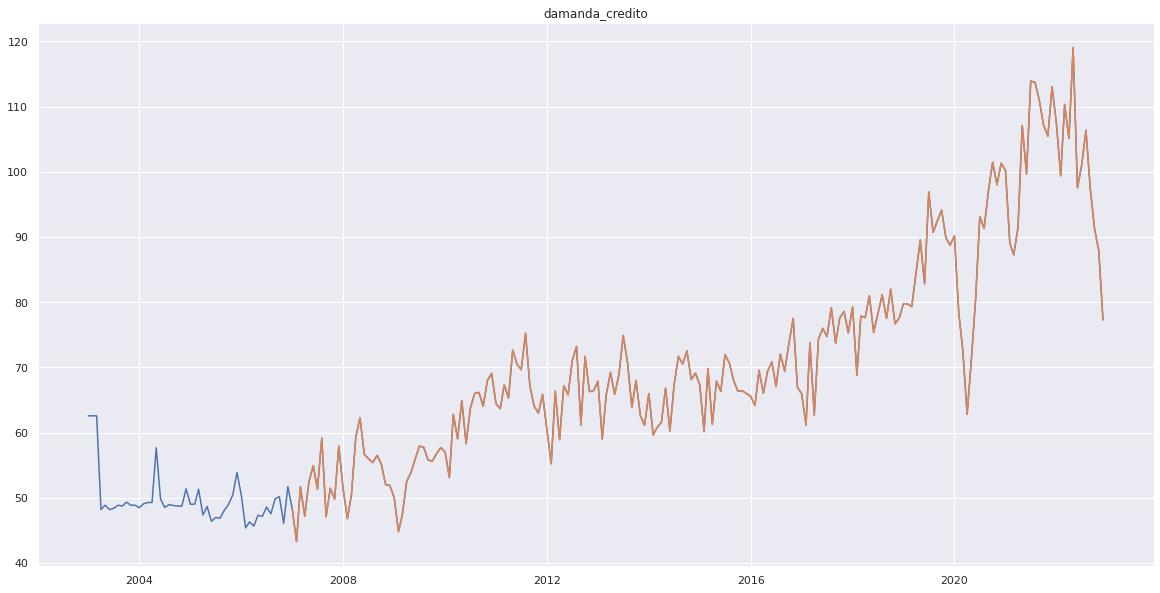

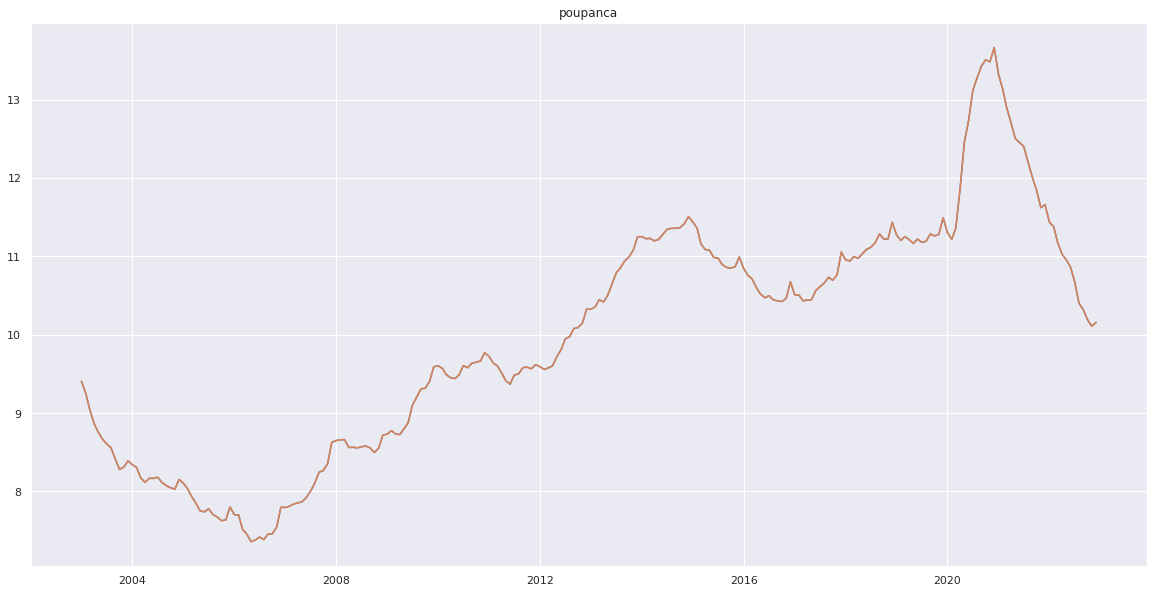

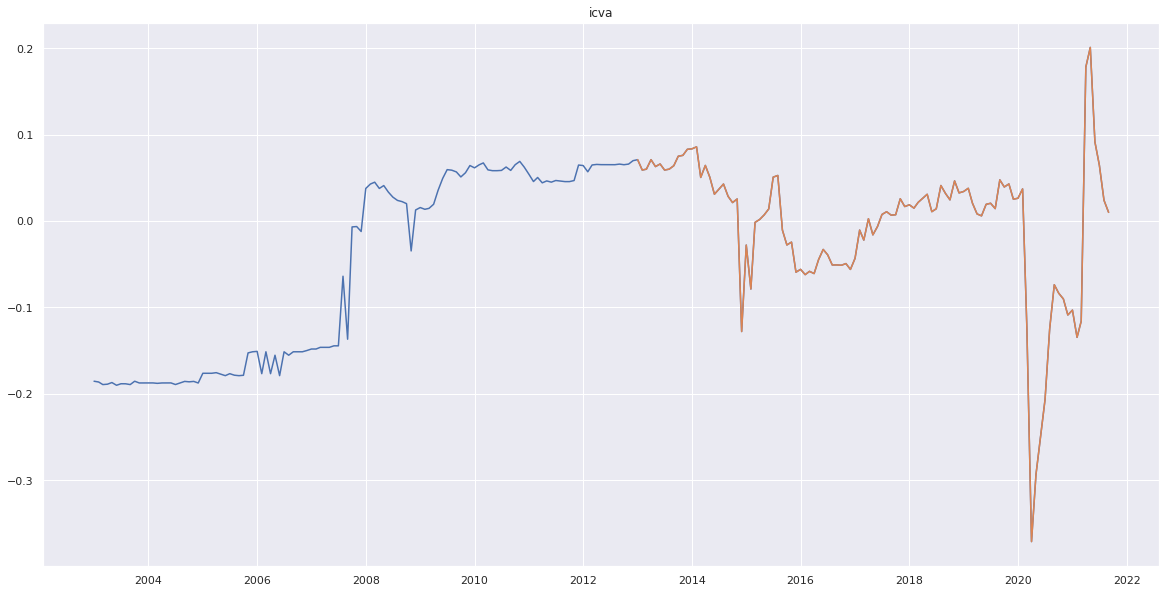

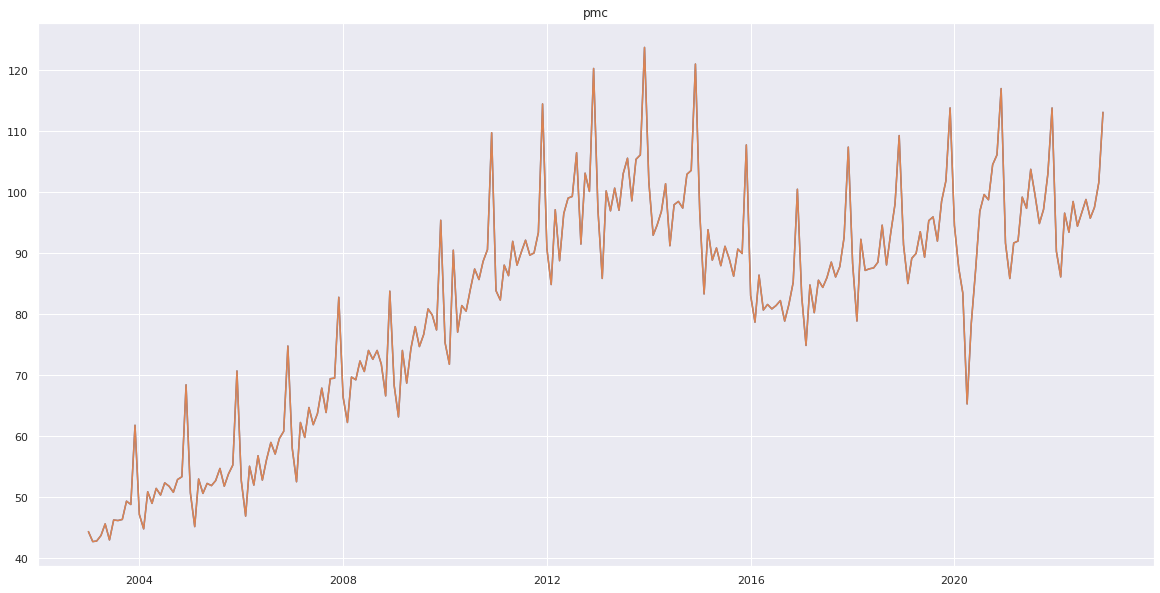

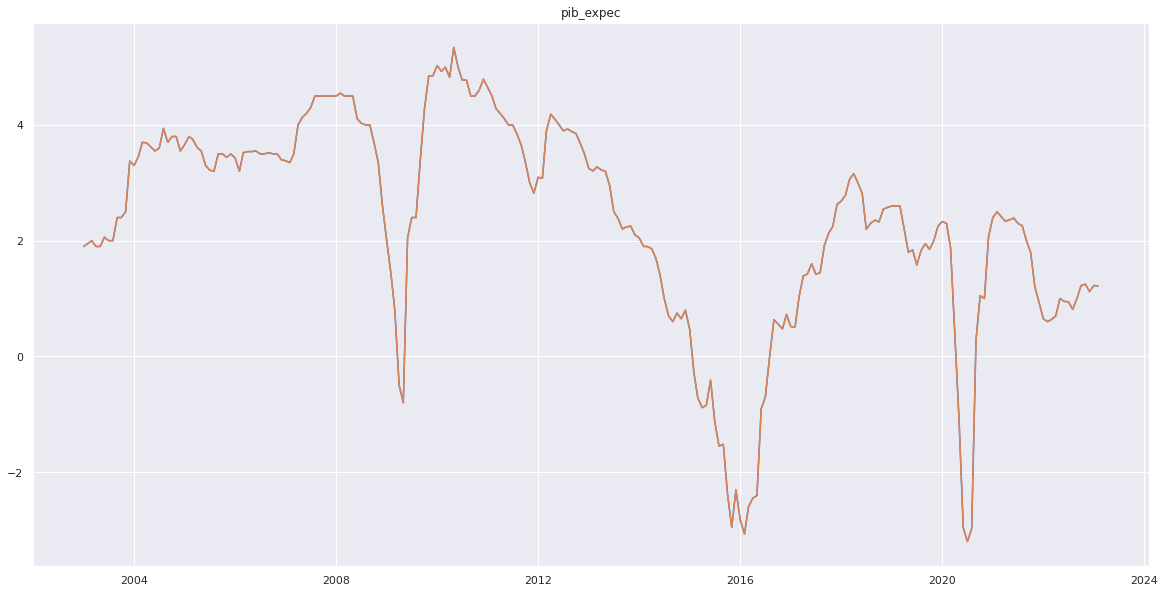

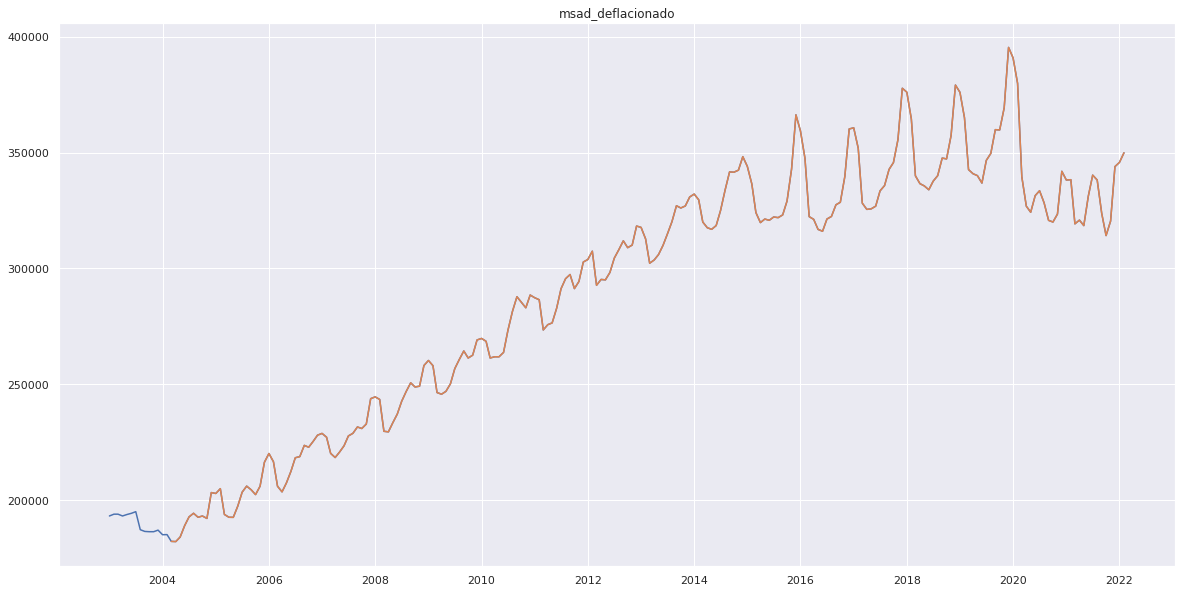

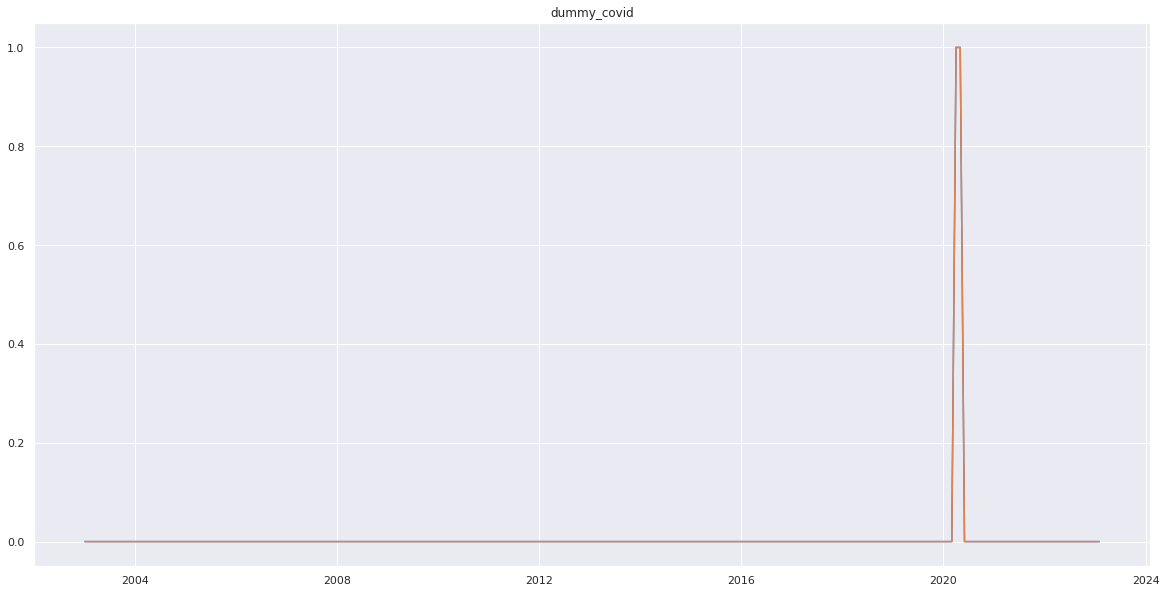

In [76]:
for i in dados.columns:
  plt.plot(dados_bac[i])
  plt.plot(dados[i])
  plt.title(i)
  plt.show()

##Estacionaridade
A TS é dita estacionária se as suas propriedades estatísticas, tais como a média e variância permanecem constantes ao longo do tempo. Mas por que isso é importante? A maioria dos modelos TS trabalha com o pressuposto de que a TS é estacionária. Intuitivamente, podemos entender que se uma TS tem um comportamento particular ao longo de um tempo, há uma probabilidade muito elevada de que seguirá o mesmo comportamento no futuro. Além disso, as teorias relacionadas com séries estacionárias são mais maduras e mais fáceis de implementar, em comparação com séries não-estacionárias.

https://www.vooo.pro/insights/guia-completo-para-criar-time-series-com-codigo-em-python/

In [77]:
def plotar(dados):
  for i in range(len(dados.columns)):
    fig, ax = plt.subplots(dpi=120)
    ax.plot(dados.iloc[:,i],label=dados.columns[i])
    plt.legend()
    plt.show()

In [78]:
plotar(dados_bac)

Output hidden; open in https://colab.research.google.com to view.

###Teste de estacionaridade Dickey-Fuller
Dickey-Fuller teste: esse é um dos testes estatísticos para verificar Estacionaridade. Aqui, a hipótese nula é que o TS é não-estacionária. Os resultados do teste são compostos por uma estatística de teste e alguns valores críticos para os níveis de confiança da diferença. Se o ‘teste estatístico’ é menor do que o “valor crítico”, podemos rejeitar a hipótese nula e dizer que a série é estacionária. Consulte este artigo para obter detalhes.

In [79]:
def test_kpss_adf(dados):
  #https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html
  def kpss_test(timeseries):
    """
    O KPSS é outro teste para verificar a estacionaridade de uma série temporal. As hipóteses nula e alternativa para o teste KPSS são opostas às do teste ADF.

    Hipótese Nula: O processo é estacionário de tendência.

    Hipótese Alternativa: A série tem raiz unitária (a série não é estacionária).

    Uma função é criada para realizar o teste KPSS em uma série temporal.
    """
    #print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
      kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    return kpss_output

  def adf_test(timeseries):

    """
    O teste ADF é usado para determinar a presença de raiz unitária na série e, portanto, ajuda a entender se a série é estacionária ou não. As hipóteses nula e 
    alternativa deste teste são:
    Hipótese Nula: A série tem raiz unitária.
    Hipótese alternativa: A série não tem raiz unitária.
    Se a hipótese nula não for rejeitada, este teste pode fornecer evidências de que a série é não estacionária.
   Uma função é criada para realizar o teste ADF em uma série temporal.
    """
    #print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
      dftest[0:4],
      index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
      dfoutput["Critical Value (%s)" % key] = value
    return dfoutput


  test_est = pd.DataFrame(index=dados.columns,columns = ['Teste_kpss', 'Estacionaria_ou_nâo_kpss','Teste_adf','Estacionaria_ou_nâo_adf'])
  for k in dados.columns:
    tes_kpss = kpss_test(dados[k].dropna())
    test_est.loc[k,test_est.columns[0]] = tes_kpss[1]
    tes_adf = adf_test(dados[k].dropna())
    test_est.loc[k,test_est.columns[2]] = tes_adf[1]
  test_est['Estacionaria_ou_nâo_kpss']=np.where(test_est['Teste_kpss'] >= 0.05,'Estacionaria','Nâo estacionaria')
  test_est['Estacionaria_ou_nâo_adf']=np.where(test_est['Teste_adf'] <= 0.05,'Estacionaria','Nâo estacionaria')
  return test_est
  

In [80]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    from statsmodels.tsa.stattools import adfuller
    import pandas as pd
    import matplotlib.pylab as plt
    import seaborn as sns
    import numpy as np
    for i in range(len(timeseries.columns)):
     #Determing rolling statistics
      rolmean = pd.Series(timeseries.iloc[:,i]).rolling(window=12).mean().dropna()
      rolstd = pd.Series(timeseries.iloc[:,i]).rolling(window=12).std().dropna()

      #Plot rolling statistics:
      if type(timeseries[dados.columns[i]][0]) != str:
        orig = plt.plot(timeseries.iloc[:,i], color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title(f'Rolling Mean & Standard Deviation na variavel {dados.columns[i]}')
        plt.show(block=False)
    
        #Perform Dickey-Fuller test:
        print (f'Results of Dickey-Fuller Test:Coluna {dados.columns[i]}')
        dftest = adfuller(timeseries.iloc[:,i].dropna(), autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
          dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)
      else:
        try:
          timeseries.iloc[:,i] = timeseries.iloc[:,i].astype(int)
          orig = plt.plot(timeseries.iloc[:,i], color='blue',label='Original')
          mean = plt.plot(rolmean, color='red', label='Rolling Mean')
          std = plt.plot(rolstd, color='black', label = 'Rolling Std')
          plt.legend(loc='best')
          plt.title(f'Rolling Mean & Standard Deviation na variavel {dados.columns[i]}')
          plt.show(block=False)
    
          #Perform Dickey-Fuller test:
          print (f'Results of Dickey-Fuller Test:Coluna {dados.columns[i]}')
          dftest = adfuller(timeseries.iloc[:,i].dropna(), autolag='AIC')
          dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
          for key,value in dftest[4].items():
           dfoutput['Critical Value (%s)'%key] = value
          print(dfoutput)
        except:
          timeseries.iloc[:,i] = timeseries.iloc[:,i].astype(float)
          orig = plt.plot(timeseries.iloc[:,i], color='blue',label='Original')
          mean = plt.plot(rolmean, color='red', label='Rolling Mean')
          std = plt.plot(rolstd, color='black', label = 'Rolling Std')
          plt.legend(loc='best')
          plt.title(f'Rolling Mean & Standard Deviation na variavel {dados.columns[i]}')
          plt.show(block=False)
    
          #Perform Dickey-Fuller test:
          print (f'Results of Dickey-Fuller Test:Coluna {dados.columns[i]}')
          dftest = adfuller(timeseries.iloc[:,i].dropna(), autolag='AIC')
          dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
          for key,value in dftest[4].items():
           dfoutput['Critical Value (%s)'%key] = value
          print(dfoutput)
        
    return test_kpss_adf(timeseries)
          

In [81]:
test = test_stationarity(dados_bac)

Output hidden; open in https://colab.research.google.com to view.

In [82]:
test

,Teste_kpss,Estacionaria_ou_nâo_kpss,Teste_adf,Estacionaria_ou_nâo_adf
comprometimento_renda,0.01,Nâo estacionaria,0.39,Nâo estacionaria
cons_energia_com,0.01,Nâo estacionaria,0.46,Nâo estacionaria
cambio,0.01,Nâo estacionaria,0.94,Nâo estacionaria
endividamento_exhabit,0.01,Nâo estacionaria,0.63,Nâo estacionaria
cheques,0.06,Estacionaria,0.07,Nâo estacionaria
imc,0.01,Nâo estacionaria,0.19,Nâo estacionaria
icc_fecomercio,0.01,Nâo estacionaria,0.18,Nâo estacionaria
ipca,0.10,Estacionaria,0.00,Estacionaria
estoque_empregos_com,0.01,Nâo estacionaria,0.27,Nâo estacionaria
selic,0.01,Nâo estacionaria,0.01,Estacionaria


###Verificando a diferenca de estacionaridade
#http://alkaline-ml.com/pmdarima/1.5.1/modules/generated/pmdarima.arima.ndiffs.html

In [83]:
from pmdarima import arima

In [84]:
def report_ndiffs (dados,test=['kpss', 'adf', 'pp'],alpha=0.05):
  dat_ndifis = pd.DataFrame(index=dados.columns)
  for i in test:
    dat_n = []
    for j in dados.columns:
      dat_n.append(arima.ndiffs(dados[j].dropna(),alpha,test=i))
    dat_ndifis[i] = dat_n
  result = []
  for k in range(len(dat_ndifis)):
    result.append(np.where(dat_ndifis.iloc[k,0]==dat_ndifis.iloc[k,1],dat_ndifis.iloc[k,0],
         np.where(dat_ndifis.iloc[k,1]==dat_ndifis.iloc[k,2],dat_ndifis.iloc[k,1],
                  np.where(dat_ndifis.iloc[k,0]==dat_ndifis.iloc[k,2],dat_ndifis.iloc[k,2],''))))
  dat_ndifis['Ndifis'] = result
  dat_ndifis.sort_values(by='Ndifis',ascending=False,inplace=True)
  dat_ndifis['Ndifis'] = dat_ndifis['Ndifis'].astype(int)
  return dat_ndifis

In [85]:
n_difis = report_ndiffs(dados_bac)
n_difis

,kpss,adf,pp,Ndifis
comprometimento_renda,1,1,1,1
cons_energia_com,1,1,0,1
msad_deflacionado,1,1,1,1
pib_expec,1,1,1,1
pmc,1,1,0,1
icva,1,1,1,1
poupanca,1,1,1,1
damanda_credito,1,1,0,1
nascimento,1,1,0,1
Familias Endividadas (% do total de famílias),0,1,1,1


###Ajustando dados nao estacionarios metodo de diferenciacao

https://www.youtube.com/watch?v=JuG8hwVK5uQ

Modelagem de séries temporais frequentemente exige a aplicação de transformações nas variáveis, tal como a bem conhecida primeira diferença. Formalmente, podemos descrever essa transformação como:


Ou seja, dado uma série temporal regularmente espaçada, subtraímos do valor em t o valor anterior (t-1), obtendo a série dita "na primeira diferença" ou "nas diferenças".

A mudança de nível da série geralmente contorna diversas características "não desejadas" pelo analista como tendência, sazonalidade, etc., mas dificulta a interpretação dos valores - especialmente quando pretende-se comunicá-los para públicos não técnicos. Para este objetivo é de grande utilidade saber como diferenciar uma série temporal e, sobretudo, também como reverter a transformação.

In [86]:
list(range(1,n_difis['Ndifis']['pmc']+1))

[1]

In [87]:
"""
def corrigindo_nao_estacionaridade(base,n_difis,valor_predicao):
  dados_est = base.copy()
  for i in n_difis[n_difis['Ndifis'] >= 1].index:
    if i == valor_predicao:
      dados_est[i] = dados_est[i]
    else:
      dados_est[i] = dados_est[i].diff(periods=n_difis[n_difis.index.isin([i])]['Ndifis'])
  return dados_est"""

"\ndef corrigindo_nao_estacionaridade(base,n_difis,valor_predicao):\n  dados_est = base.copy()\n  for i in n_difis[n_difis['Ndifis'] >= 1].index:\n    if i == valor_predicao:\n      dados_est[i] = dados_est[i]\n    else:\n      dados_est[i] = dados_est[i].diff(periods=n_difis[n_difis.index.isin([i])]['Ndifis'])\n  return dados_est"

In [88]:
def corrigindo_nao_estacionaridade(base,n_difis,valor_predicao):
  dados_est = base.copy()
  for i in n_difis[n_difis['Ndifis'] >= 1].index:
    if i == valor_predicao:
      dados_est[i] = dados_est[i]
    else:
      j = 0
      while j < n_difis['Ndifis'][i]:
        dados_est[i] = dados_est[i].diff(periods=1)
        j = j+1
  return dados_est

In [89]:
dados_est = corrigindo_nao_estacionaridade(dados_bac,n_difis,'pmc')
dados_est

,comprometimento_renda,cons_energia_com,cambio,endividamento_exhabit,cheques,imc,icc_fecomercio,ipca,estoque_empregos_com,selic,...,Familias Endividadas (% do total de famílias),falencias,nascimento,damanda_credito,poupanca,icva,pmc,pib_expec,msad_deflacionado,dummy_covid
2003-01-01,NaN,NaN,NaN,NaN,NaN,1526624.62,NaN,2.25,NaN,NaN,...,NaN,0.00,NaN,NaN,NaN,NaN,44.34,NaN,NaN,0
2003-02-01,0.00,-29.00,0.04,0.00,-50778.00,1526624.62,0.56,1.57,22685.08,0.62,...,0.00,0.00,0.00,0.00,-0.15,-0.00,42.70,0.05,777.08,0
2003-03-01,0.00,68.00,-0.21,0.00,6113.00,1459716.38,-1.64,1.23,14026.62,0.64,...,0.00,0.00,-228.12,0.00,-0.20,-0.00,42.79,0.05,0.00,0
2003-04-01,0.03,-273.00,-0.46,-0.01,15976.00,1462875.38,5.77,0.97,16619.00,0.00,...,0.00,0.00,-97.96,-14.36,-0.18,0.00,43.70,-0.10,-777.08,0
2003-05-01,0.00,-10.00,0.08,0.00,-35578.00,1463866.62,4.38,0.61,15959.79,-0.01,...,-0.00,0.00,-188.13,0.65,-0.11,0.00,45.61,0.00,623.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,NaN,90.00,-0.15,NaN,146999.00,1742839.00,2.77,0.59,25147.46,0.00,...,-0.00,10.00,-3872.00,-6.08,-0.13,NaN,97.51,0.23,NaN,0
2022-11-01,NaN,238.00,0.04,NaN,NaN,NaN,2.56,0.41,25642.09,0.00,...,-0.00,24.00,NaN,-3.47,-0.09,NaN,101.58,0.02,NaN,0
2022-12-01,NaN,NaN,-0.08,NaN,NaN,NaN,6.05,0.62,24233.42,0.00,...,-0.01,10.00,NaN,-10.58,0.05,NaN,113.10,-0.13,NaN,0
2023-01-01,NaN,NaN,-0.12,NaN,NaN,NaN,2.54,0.53,NaN,0.00,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.10,NaN,0


In [90]:
plotar(dados_est)

Output hidden; open in https://colab.research.google.com to view.

In [91]:
report_ndiffs(dados_est)

,kpss,adf,pp,Ndifis
pmc,1,1,0,1
comprometimento_renda,0,0,0,0
cons_energia_com,0,0,0,0
msad_deflacionado,0,0,0,0
pib_expec,0,0,0,0
icva,0,0,0,0
poupanca,0,0,0,0
damanda_credito,0,0,0,0
nascimento,0,0,0,0
falencias,1,0,0,0


##Corrigir atrasos de publicacao 

In [92]:
dados_est = dados_est[2:]

In [93]:
dados_est

,comprometimento_renda,cons_energia_com,cambio,endividamento_exhabit,cheques,imc,icc_fecomercio,ipca,estoque_empregos_com,selic,...,Familias Endividadas (% do total de famílias),falencias,nascimento,damanda_credito,poupanca,icva,pmc,pib_expec,msad_deflacionado,dummy_covid
2003-03-01,0.00,68.00,-0.21,0.00,6113.00,1459716.38,-1.64,1.23,14026.62,0.64,...,0.00,0.00,-228.12,0.00,-0.20,-0.00,42.79,0.05,0.00,0
2003-04-01,0.03,-273.00,-0.46,-0.01,15976.00,1462875.38,5.77,0.97,16619.00,0.00,...,0.00,0.00,-97.96,-14.36,-0.18,0.00,43.70,-0.10,-777.08,0
2003-05-01,0.00,-10.00,0.08,0.00,-35578.00,1463866.62,4.38,0.61,15959.79,-0.01,...,-0.00,0.00,-188.13,0.65,-0.11,0.00,45.61,0.00,623.75,0
2003-06-01,0.05,-227.00,-0.09,-0.00,41884.00,1472338.88,4.77,-0.15,16415.29,-0.22,...,-0.00,0.00,1119.49,-0.67,-0.09,-0.00,42.97,0.16,524.20,0
2003-07-01,0.01,-44.00,0.09,0.02,-19801.00,1474811.25,-5.34,0.20,17312.34,-0.73,...,0.00,0.00,0.00,0.19,-0.06,0.00,46.24,-0.06,707.44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,NaN,90.00,-0.15,NaN,146999.00,1742839.00,2.77,0.59,25147.46,0.00,...,-0.00,10.00,-3872.00,-6.08,-0.13,NaN,97.51,0.23,NaN,0
2022-11-01,NaN,238.00,0.04,NaN,NaN,NaN,2.56,0.41,25642.09,0.00,...,-0.00,24.00,NaN,-3.47,-0.09,NaN,101.58,0.02,NaN,0
2022-12-01,NaN,NaN,-0.08,NaN,NaN,NaN,6.05,0.62,24233.42,0.00,...,-0.01,10.00,NaN,-10.58,0.05,NaN,113.10,-0.13,NaN,0
2023-01-01,NaN,NaN,-0.12,NaN,NaN,NaN,2.54,0.53,NaN,0.00,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.10,NaN,0


In [94]:
##Substituindo os ultimos valores pelos anterires
#dad = dados_est.fillna(method='ffill')

In [95]:
dados_sem = dados_est.copy()
for k in dados_est.columns[dados_sem.isnull().sum() > 0]:
  model_arima = arima.auto_arima(dados_sem[k].dropna().values, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
  model_arima.fit(dados_sem[k].values)
  a = model_arima.predict(n_periods=int(dados_sem[k].isnull().sum()))
  for i in a:
    dados_sem[k] = dados_sem[k].fillna(i,limit=1)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=11.877, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=33.047, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=10.351, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=13.318, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=10.889, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=7.912, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-15.423, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-12.829, Time=0.09 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-28.393, Time=0.17 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-26.589, Time=0.18 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-26.538, Time=0.42 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-27.988, Time=0.21 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-30.010, Time=0.35 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-27.251, Time=0.28 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-18.287, Tim

In [96]:
dados_sem

,comprometimento_renda,cons_energia_com,cambio,endividamento_exhabit,cheques,imc,icc_fecomercio,ipca,estoque_empregos_com,selic,...,Familias Endividadas (% do total de famílias),falencias,nascimento,damanda_credito,poupanca,icva,pmc,pib_expec,msad_deflacionado,dummy_covid
2003-03-01,0.00,68.00,-0.21,0.00,6113.00,1459716.38,-1.64,1.23,14026.62,0.64,...,0.00,0.00,-228.12,0.00,-0.20,-0.00,42.79,0.05,0.00,0
2003-04-01,0.03,-273.00,-0.46,-0.01,15976.00,1462875.38,5.77,0.97,16619.00,0.00,...,0.00,0.00,-97.96,-14.36,-0.18,0.00,43.70,-0.10,-777.08,0
2003-05-01,0.00,-10.00,0.08,0.00,-35578.00,1463866.62,4.38,0.61,15959.79,-0.01,...,-0.00,0.00,-188.13,0.65,-0.11,0.00,45.61,0.00,623.75,0
2003-06-01,0.05,-227.00,-0.09,-0.00,41884.00,1472338.88,4.77,-0.15,16415.29,-0.22,...,-0.00,0.00,1119.49,-0.67,-0.09,-0.00,42.97,0.16,524.20,0
2003-07-01,0.01,-44.00,0.09,0.02,-19801.00,1474811.25,-5.34,0.20,17312.34,-0.73,...,0.00,0.00,0.00,0.19,-0.06,0.00,46.24,-0.06,707.44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,0.04,90.00,-0.15,0.33,146999.00,1742839.00,2.77,0.59,25147.46,0.00,...,-0.00,10.00,-3872.00,-6.08,-0.13,-0.00,97.51,0.23,707.17,0
2022-11-01,0.04,238.00,0.04,0.33,-21035.42,1742839.00,2.56,0.41,25642.09,0.00,...,-0.00,24.00,263.69,-3.47,-0.09,-0.00,101.58,0.02,633.68,0
2022-12-01,0.04,-232.09,-0.08,0.33,-40638.37,1742839.00,6.05,0.62,24233.42,0.00,...,-0.01,10.00,161.44,-10.58,0.05,-0.00,113.10,-0.13,599.16,0
2023-01-01,0.04,-307.83,-0.12,0.33,14202.82,1742839.00,2.54,0.53,27400.95,0.00,...,0.00,25.52,102.24,4.37,-0.01,-0.00,103.31,0.10,609.50,0


In [97]:
for i in dados_bac.columns:
  plt.plot(dados_sem[i], label= 'Dados sem Nan')
  plt.plot(dados_est[i], label = 'Dados com Nan')
  plt.title(i)
  plt.legend()
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [98]:
dados_sem.to_csv('dados_pmc.csv')

##Dividindo os dados em treino e teste

In [188]:
dados_sem

,comprometimento_renda,cons_energia_com,cambio,endividamento_exhabit,cheques,imc,icc_fecomercio,ipca,estoque_empregos_com,selic,...,Familias Endividadas (% do total de famílias),falencias,nascimento,damanda_credito,poupanca,icva,pmc,pib_expec,msad_deflacionado,dummy_covid
2003-03-01,0.00,68.00,-0.21,0.00,6113.00,1459716.38,-1.64,1.23,14026.62,0.64,...,0.00,0.00,-228.12,0.00,-0.20,-0.00,42.79,0.05,0.00,0
2003-04-01,0.03,-273.00,-0.46,-0.01,15976.00,1462875.38,5.77,0.97,16619.00,0.00,...,0.00,0.00,-97.96,-14.36,-0.18,0.00,43.70,-0.10,-777.08,0
2003-05-01,0.00,-10.00,0.08,0.00,-35578.00,1463866.62,4.38,0.61,15959.79,-0.01,...,-0.00,0.00,-188.13,0.65,-0.11,0.00,45.61,0.00,623.75,0
2003-06-01,0.05,-227.00,-0.09,-0.00,41884.00,1472338.88,4.77,-0.15,16415.29,-0.22,...,-0.00,0.00,1119.49,-0.67,-0.09,-0.00,42.97,0.16,524.20,0
2003-07-01,0.01,-44.00,0.09,0.02,-19801.00,1474811.25,-5.34,0.20,17312.34,-0.73,...,0.00,0.00,0.00,0.19,-0.06,0.00,46.24,-0.06,707.44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,0.04,90.00,-0.15,0.33,146999.00,1742839.00,2.77,0.59,25147.46,0.00,...,-0.00,10.00,-3872.00,-6.08,-0.13,-0.00,97.51,0.23,707.17,0
2022-11-01,0.04,238.00,0.04,0.33,-21035.42,1742839.00,2.56,0.41,25642.09,0.00,...,-0.00,24.00,263.69,-3.47,-0.09,-0.00,101.58,0.02,633.68,0
2022-12-01,0.04,-232.09,-0.08,0.33,-40638.37,1742839.00,6.05,0.62,24233.42,0.00,...,-0.01,10.00,161.44,-10.58,0.05,-0.00,113.10,-0.13,599.16,0
2023-01-01,0.04,-307.83,-0.12,0.33,14202.82,1742839.00,2.54,0.53,27400.95,0.00,...,0.00,25.52,102.24,4.37,-0.01,-0.00,103.31,0.10,609.50,0


In [189]:
treino = dados_sem[dados_sem.index < pd.to_datetime('2021-01-01')]

In [190]:
treino.head()

,comprometimento_renda,cons_energia_com,cambio,endividamento_exhabit,cheques,imc,icc_fecomercio,ipca,estoque_empregos_com,selic,...,Familias Endividadas (% do total de famílias),falencias,nascimento,damanda_credito,poupanca,icva,pmc,pib_expec,msad_deflacionado,dummy_covid
2003-03-01,0.00,68.00,-0.21,0.00,6113.00,1459716.38,-1.64,1.23,14026.62,0.64,...,0.00,0.00,-228.12,0.00,-0.20,-0.00,42.79,0.05,0.00,0
2003-04-01,0.03,-273.00,-0.46,-0.01,15976.00,1462875.38,5.77,0.97,16619.00,0.00,...,0.00,0.00,-97.96,-14.36,-0.18,0.00,43.70,-0.10,-777.08,0
2003-05-01,0.00,-10.00,0.08,0.00,-35578.00,1463866.62,4.38,0.61,15959.79,-0.01,...,-0.00,0.00,-188.13,0.65,-0.11,0.00,45.61,0.00,623.75,0
2003-06-01,0.05,-227.00,-0.09,-0.00,41884.00,1472338.88,4.77,-0.15,16415.29,-0.22,...,-0.00,0.00,1119.49,-0.67,-0.09,-0.00,42.97,0.16,524.20,0
2003-07-01,0.01,-44.00,0.09,0.02,-19801.00,1474811.25,-5.34,0.20,17312.34,-0.73,...,0.00,0.00,0.00,0.19,-0.06,0.00,46.24,-0.06,707.44,0


In [191]:
y_treino = treino['pmc'].values
x_treino = treino.loc[:,treino.columns != 'pmc'].values

In [192]:
teste = dados_sem[dados_sem.index >= pd.to_datetime('2021-01-01')]

In [193]:
teste.head()

,comprometimento_renda,cons_energia_com,cambio,endividamento_exhabit,cheques,imc,icc_fecomercio,ipca,estoque_empregos_com,selic,...,Familias Endividadas (% do total de famílias),falencias,nascimento,damanda_credito,poupanca,icva,pmc,pib_expec,msad_deflacionado,dummy_covid
2021-01-01,-0.18,15.00,0.28,0.36,447060.00,1986719.00,4.38,0.25,91412.46,0.00,...,-0.00,9.00,4275.57,-1.09,-0.34,0.01,91.65,0.33,-3756.13,0
2021-02-01,-0.54,-34.00,0.05,0.28,98302.00,2128209.00,0.14,0.86,106973.94,0.00,...,0.00,16.00,-2574.89,-11.13,-0.19,-0.03,85.85,0.10,131.34,0
2021-03-01,0.09,484.00,0.17,0.27,-960529.00,1168521.00,-3.33,0.93,18102.65,0.33,...,-0.00,15.00,4489.72,-1.84,-0.24,0.02,91.67,-0.08,-19060.18,0
2021-04-01,-0.45,-743.00,-0.29,0.20,-177830.00,1204380.00,-7.95,0.31,-953.74,0.42,...,-0.00,7.00,-142.52,4.26,-0.19,0.29,91.99,-0.08,1614.56,0
2021-05-01,0.69,-443.00,-0.17,0.72,90987.00,1203387.00,0.95,0.83,54487.52,0.64,...,0.00,23.00,-287.60,15.59,-0.20,0.02,99.19,0.02,-2370.24,0


In [194]:
y_teste = teste['pmc'].values
x_teste= teste.loc[:,teste.columns != 'pmc'].values

#Aplicando Grid Search


##Treinando o RandomForestRegressor

In [ ]:
from scipy.stats import randint as sp_randint

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
# definindo os hiperparâmetros
param_grid = {
  "n_estimators": [10, 20,50,60,100],
  "max_depth": [1,2,30,70,100],
  "min_samples_split": [2, 6,8,11],
  "min_samples_leaf": [1,4,9,11],
  "max_features": [1, 3,10,15,23],
  'criterion':['squared_error','absolute_error','friedman_mse']
}

# definição do RMSE como métrica de avaliação



# instanciando o modelo de random forest
rf = RandomForestRegressor()

# instanciando o randomized search
#random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, scoring= ['neg_root_mean_squared_error','neg_mean_absolute_percentage_error','neg_mean_absolute_error'], refit=False, cv=5, verbose=3)

search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring= 'neg_root_mean_squared_error', cv=5, verbose=3)


# fit no modelo
search.fit(x_treino, y_treino)

# print dos melhores hiperparâmetros



A saída de streaming foi truncada nas últimas 5000 linhas.
[CV 1/5] END criterion=friedman_mse, max_depth=30, max_features=10, min_samples_leaf=9, min_samples_split=2, n_estimators=10;, score=-27.230 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=30, max_features=10, min_samples_leaf=9, min_samples_split=2, n_estimators=10;, score=-16.046 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=30, max_features=10, min_samples_leaf=9, min_samples_split=2, n_estimators=10;, score=-11.576 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=30, max_features=10, min_samples_leaf=9, min_samples_split=2, n_estimators=10;, score=-10.496 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=30, max_features=10, min_samples_leaf=9, min_samples_split=2, n_estimators=10;, score=-11.855 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=30, max_features=10, min_samples_leaf=9, min_samples_split=2, n_estimators=20;, score=-25.267 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'max_depth': [1, 2, 30, 70, 100],
                         'max_features': [1, 3, 10, 15, 23],
                         'min_samples_leaf': [1, 4, 9, 11],
                         'min_samples_split': [2, 6, 8, 11],
                         'n_estimators': [10, 20, 50, 60, 100]},
             scoring='neg_root_mean_squared_error', verbose=3)

In [ ]:
search.best_estimator_

RandomForestRegressor(max_depth=100, max_features=15, min_samples_leaf=4,
                      min_samples_split=8, n_estimators=20)

##Treinando o Reggressao lasso

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = [LinearRegression(), Ridge(), Lasso()]
param_grid = [
    {'fit_intercept': [True, False]},
    {'alpha': np.logspace(-3, 3, 1000)},
    {'alpha': np.logspace(-3, 3, 1020)}]
for model, param_grid_model in zip(models, param_grid):
    grid_search = GridSearchCV(model, param_grid_model, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
    grid_search.fit(x_treino, y_treino)
    print(f"Model: {type(model).__name__}")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_}")
    print("")


Model: LinearRegression
Best parameters: {'fit_intercept': False}
Best cross-validation score: -650.0559384084943



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.00785e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.01966e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.03163e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.04377e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

Model: Ridge
Best parameters: {'alpha': 0.001}
Best cross-validation score: -820.3824493484742

Model: Lasso
Best parameters: {'alpha': 84.79322206477522}
Best cross-validation score: -239.99960817201364



## Treinando gradiente Bosting 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Carregue os dados de treinamento e teste

# Lista com os modelos de regressão a serem testados
models = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor()]

# Dicionário com os parâmetros a serem testados para cada modelo
param_grid = [
    {'fit_intercept': [True, False]},
    {'alpha': np.logspace(-3, 3, 7)},
    {'alpha': np.logspace(-3, 3, 7)},
    {'max_depth': [None, 1, 2, 3, 4, 5]},
    {'n_estimators': [10, 50, 100, 200, 500], 'max_depth': [None, 1, 2, 3, 4, 5]},
    {'n_estimators': [10, 50, 100, 200, 500], 'learning_rate': [0.1, 0.05, 0.01]}
]

# Loop através de cada modelo
for model, param_grid_model in zip(models, param_grid):
    grid_search = GridSearchCV(model, param_grid_model, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
    grid_search.fit(x_treino, y_treino)
    print(f"Model: {type(model).__name__}")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_}")
    print("")


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
# instanciar o modelo de Gradient Boosting
model = GradientBoostingRegressor()

# definir os hiperparâmetros a serem testados
param_grid = {
    "loss":["ls", "lad", "huber", "quantile"],
    "learning_rate":[0.1, 0.05, 0.01],
    "n_estimators":[100, 250, 500],
    "max_depth":[3, 5, 7, 9],
    "min_samples_split":[2, 4, 8],
    "min_samples_leaf":[1, 2, 4]
}

# instanciar o GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error',verbose=3)

# fit no modelo
grid_search.fit(x_treino, y_treino)

# print dos melhores hiperparâmetros
print("Melhores hiperparâmetros: ", grid_search.best_params_)

# prever com os melhores hiperparâmetros
y_pred = grid_search.predict(x_teste)


In [ ]:
grid_search.best_estimator_

GradientBoostingRegressor(loss='lad', max_depth=5, min_samples_leaf=2,
                          min_samples_split=4, n_estimators=500)

In [ ]:
grid_search.best_params_

{'learning_rate': 0.1,
 'loss': 'lad',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 500}

In [ ]:
grid_search.best_score_

-187.41472930081662

#Treinando os modelos com os melhores paramentros

In [106]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_regression(y_true, y_pred, algorithm):
    metrics = {}
    metrics['MAE'] = mean_absolute_error(y_true, y_pred)
    metrics['MSE'] = mean_squared_error(y_true, y_pred)
    metrics['RMSE'] = np.sqrt(metrics['MSE'])
    metrics['R²'] = r2_score(y_true, y_pred)
    metrics_df = pd.DataFrame(metrics, index=[algorithm])
    return metrics_df


In [107]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lasso = Lasso(random_state=0,alpha=84.79)
lasso.fit(x_treino, y_treino)

Lasso(alpha=84.79, random_state=0)

In [108]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=100, max_features=15, min_samples_leaf=4, min_samples_split=8, n_estimators=20)
rfr.fit(x_treino, y_treino)

RandomForestRegressor(max_depth=100, max_features=15, min_samples_leaf=4,
                      min_samples_split=8, n_estimators=20)

In [109]:
from sklearn.ensemble import GradientBoostingRegressor
grad_bost = GradientBoostingRegressor(random_state=0, learning_rate= 0.1,loss='absolute_error',max_depth=5, min_samples_leaf= 2,min_samples_split=4,n_estimators=500)
grad_bost.fit(x_treino, y_treino)

GradientBoostingRegressor(loss='absolute_error', max_depth=5,
                          min_samples_leaf=2, min_samples_split=4,
                          n_estimators=500, random_state=0)

In [266]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=25,activation='relu',input_shape=(x_treino.shape[1],),activity_regularizer='l1'))
model.add(tf.keras.layers.Dropout(0.20))
model.add(tf.keras.layers.Dense(units=25,activation='relu',activity_regularizer='l1'))
model.add(tf.keras.layers.Dropout(0.20))
model.add(tf.keras.layers.Dense(units=25,activation='relu',activity_regularizer='l1'))
model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(units=1,activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.fit(x_treino, y_treino, epochs=2000,batch_size=100)

Epoch 1/2000
3/3 [==============================] - 4s 10ms/step - loss: 19639558144.0000 - mean_absolute_error: 112610.8594
Epoch 2/2000
3/3 [==============================] - 0s 8ms/step - loss: 16070081536.0000 - mean_absolute_error: 97880.3516
Epoch 3/2000
3/3 [==============================] - 0s 7ms/step - loss: 10820536320.0000 - mean_absolute_error: 83962.8125
Epoch 4/2000
3/3 [==============================] - 0s 7ms/step - loss: 8068858880.0000 - mean_absolute_error: 72246.0859
Epoch 5/2000
3/3 [==============================] - 0s 7ms/step - loss: 9284762624.0000 - mean_absolute_error: 73153.9453
Epoch 6/2000
3/3 [==============================] - 0s 7ms/step - loss: 7826786304.0000 - mean_absolute_error: 69383.5547
Epoch 7/2000
3/3 [==============================] - 0s 8ms/step - loss: 5396617728.0000 - mean_absolute_error: 58693.7070
Epoch 8/2000
3/3 [==============================] - 0s 7ms/step - loss: 4840909824.0000 - mean_absolute_error: 53596.8906
Epoch 9/2000
3/3 [=

##Avaliando os residuos dos medelos

https://medium.com/@krzysztofdrelczuk/acf-autocorrelation-function-simple-explanation-with-python-example-492484c32711

###Regressao lasso
Model: Lasso
Best parameters: {'alpha': 84.79322206477522}
Best cross-validation score: -240.0006812727942

In [111]:
predic_treino_lasso = lasso.predict(x_treino)

In [112]:
residuo_lasso = y_treino - predic_treino_lasso

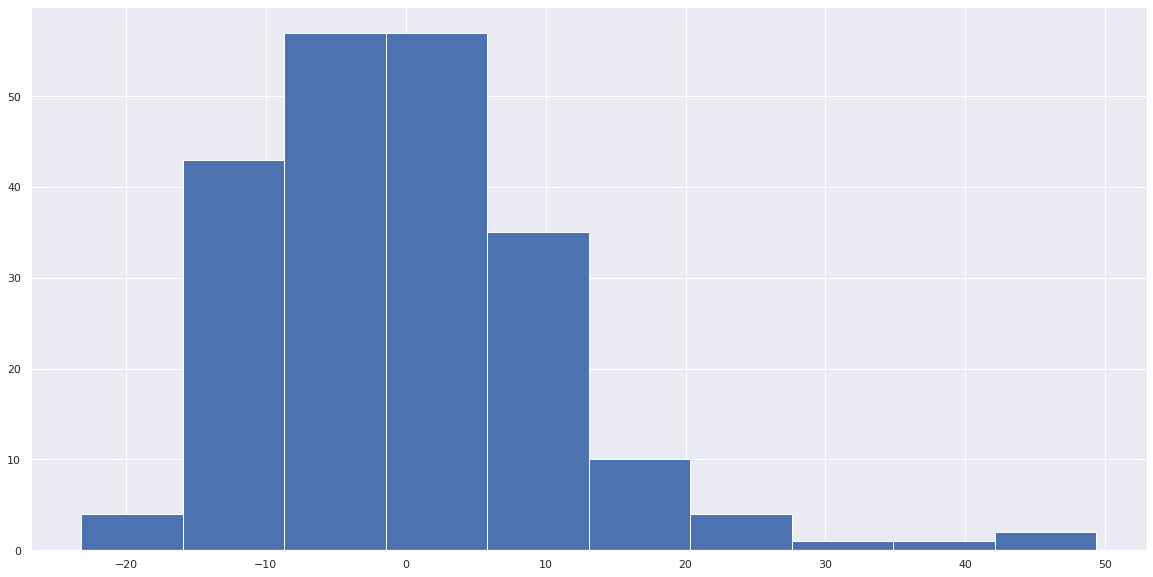

In [113]:
plt.hist(residuo_lasso);

In [114]:
import statsmodels.api as sm

Gráfico ACF de resíduos
Com dados de séries temporais, é altamente provável que o valor de uma variável observada no período de tempo atual seja semelhante ao seu valor no período anterior, ou mesmo no período anterior a esse, e assim por diante. Portanto, ao ajustar um modelo de regressão a dados de séries temporais, é comum encontrar autocorrelação nos resíduos. Nesse caso, o modelo estimado viola a suposição de não haver autocorrelação nos erros, e nossas previsões podem ser ineficientes — sobra alguma informação que deve ser contabilizada no modelo para obter melhores previsões. As previsões de um modelo com erros autocorrelacionados ainda não são viesadas e, portanto, não estão “erradas”, mas geralmente terão intervalos de previsão maiores do que o necessário. Portanto, devemos sempre olhar para um gráfico ACF dos resíduos.

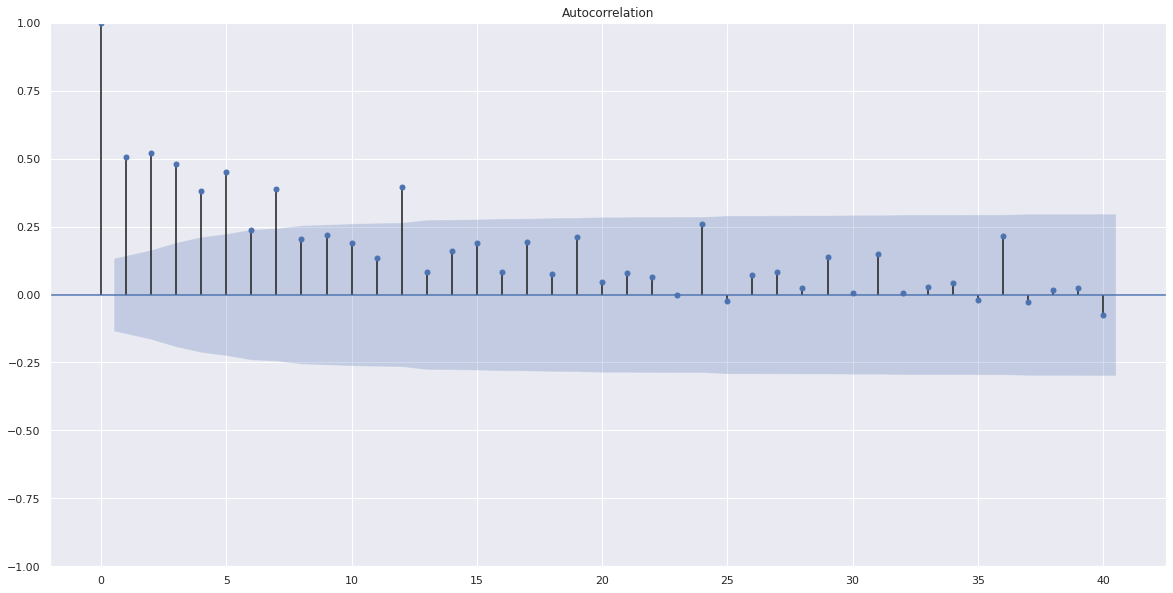

In [115]:
sm.graphics.tsa.plot_acf(residuo_lasso,lags=40)
plt.show()

###Random forest
RandomForestRegressor(max_depth=100, max_features=15, min_samples_leaf=4,
                      min_samples_split=8, n_estimators=20)

In [116]:
predic_rando_treino = rfr.predict(x_treino)

In [117]:
residuo_random = y_treino-predic_rando_treino

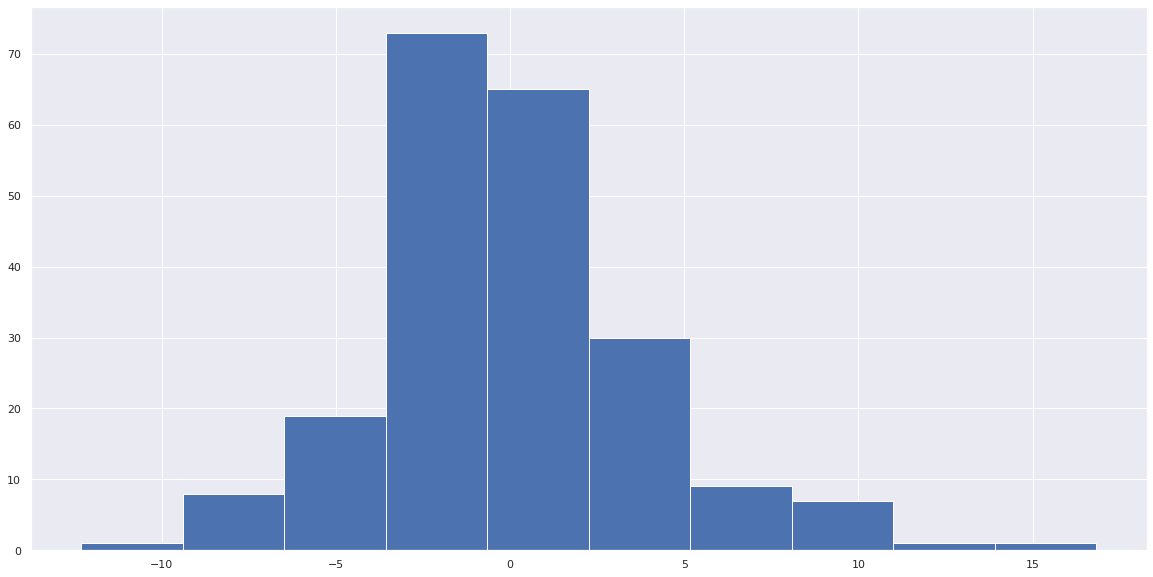

In [118]:
plt.hist(residuo_random);

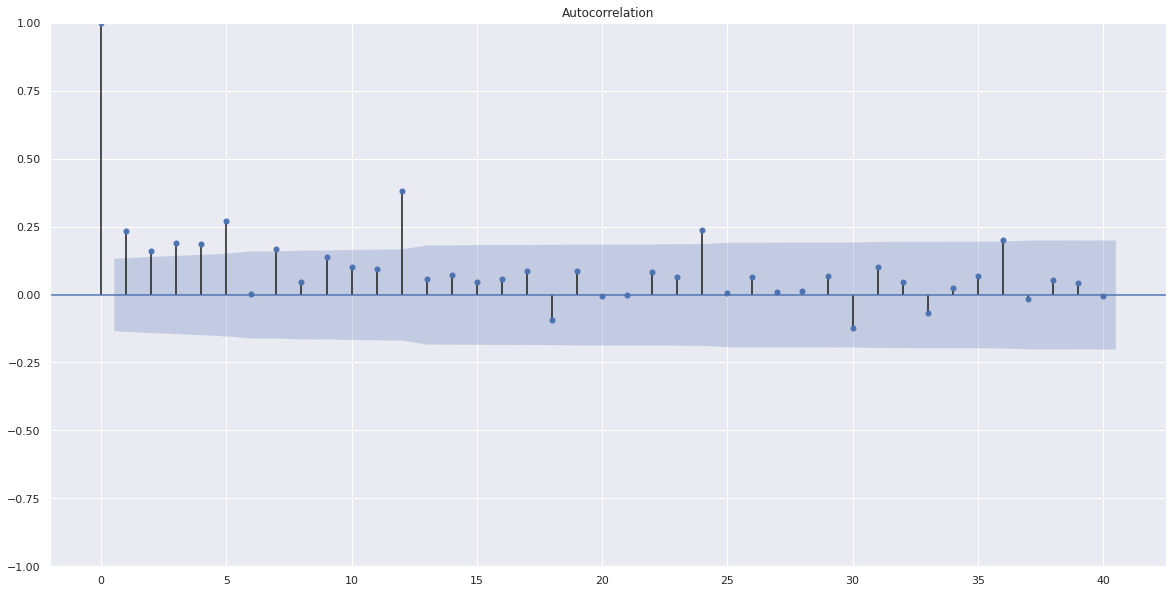

In [119]:
sm.graphics.tsa.plot_acf(residuo_random,lags=40)
plt.show()

###Gradiente Boosting
{'learning_rate': 0.1,
 'loss': 'lad',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 500}

In [120]:
predict_grad_treino = grad_bost.predict(x_treino)

In [121]:
residuo_grad = y_treino - predict_grad_treino

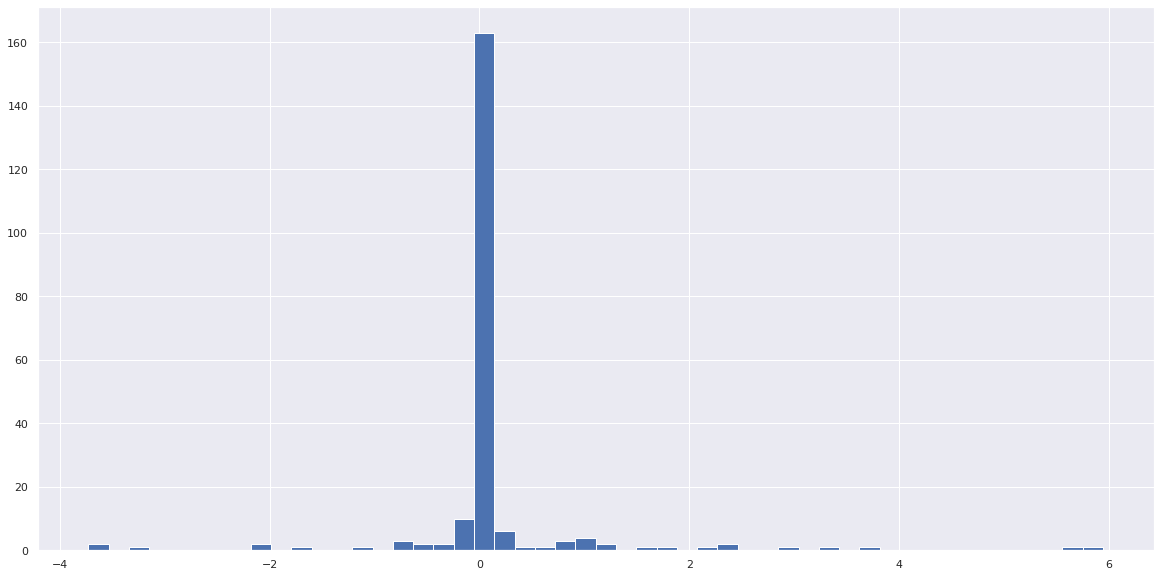

In [122]:
plt.hist(residuo_grad,bins=50);

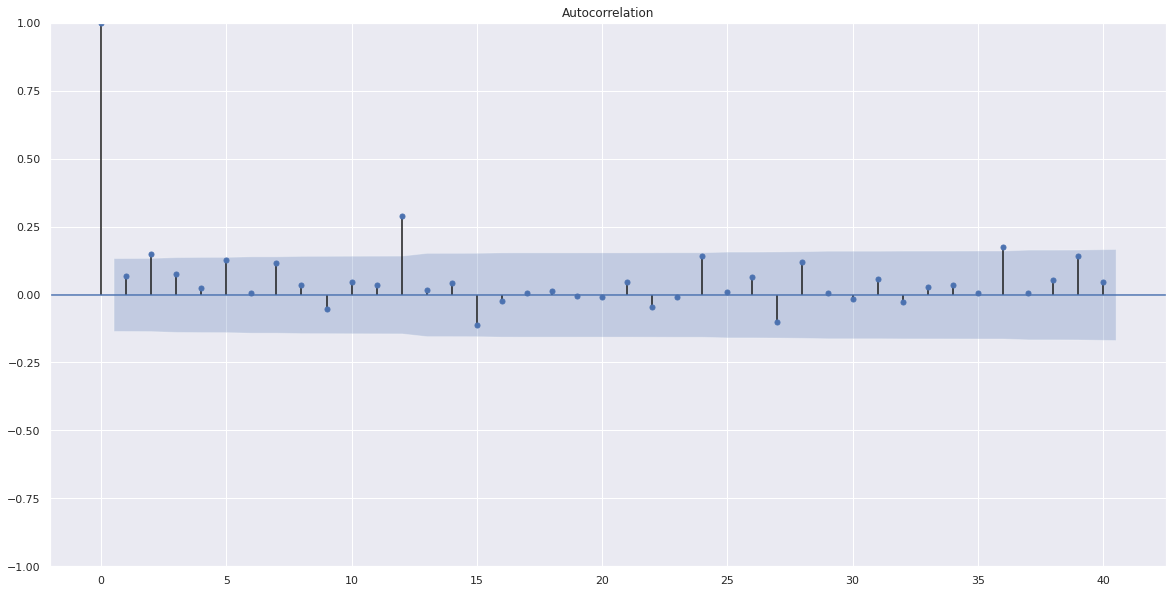

In [123]:
sm.graphics.tsa.plot_acf(residuo_grad,lags=40)
plt.show()

###Redes neurais

In [209]:
predict_redes_treino = model.predict(x_treino)

7/7 [==============================] - 0s 3ms/step


In [210]:
#Retirando um dimensao do array
predict_redes_treino = np.squeeze(predict_redes_treino)
predict_redes_treino

array([ 31.63622 ,  32.071983,  29.468168,  33.73252 ,  29.594526,
        38.154022,  44.549446,  26.881235,  29.631098,  26.920721,
        41.15452 ,  27.693745,  28.697992,  26.174599,  28.502645,
        28.636852,  27.82737 ,  26.075924,  38.550144,  28.37015 ,
        27.41715 ,  25.364147,  38.700714,  30.625875,  29.015463,
        33.28126 ,  27.827808,  25.211218,  30.718588,  28.278292,
        32.381695,  34.044823,  34.664738,  26.217224,  36.298126,
        30.14306 ,  34.77525 ,  34.212116,  29.823265,  30.274721,
        30.360167,  35.418655,  30.78721 ,  31.641722,  32.46483 ,
        31.63597 ,  26.686548,  33.671658,  36.405914,  32.125114,
        35.041767,  36.642   ,  32.39564 ,  36.789875,  35.347965,
        34.9233  ,  32.610973,  23.956451,  38.103043,  29.703293,
        37.87248 ,  61.856678,  31.699987,  28.981459,  38.898968,
        34.052017,  43.127453,  34.11604 ,  44.23742 ,  32.490543,
        36.79906 ,  36.711544,  43.45168 ,  34.089626,  34.089

In [211]:
residuo_neurais = y_treino - predict_redes_treino

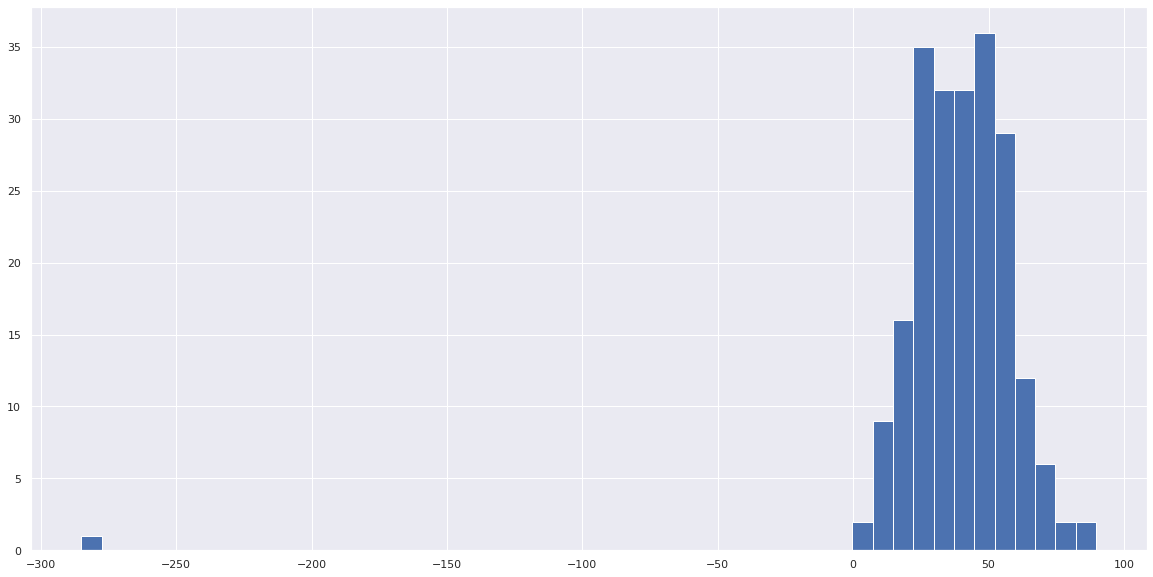

In [212]:
plt.hist(residuo_neurais,bins=50);

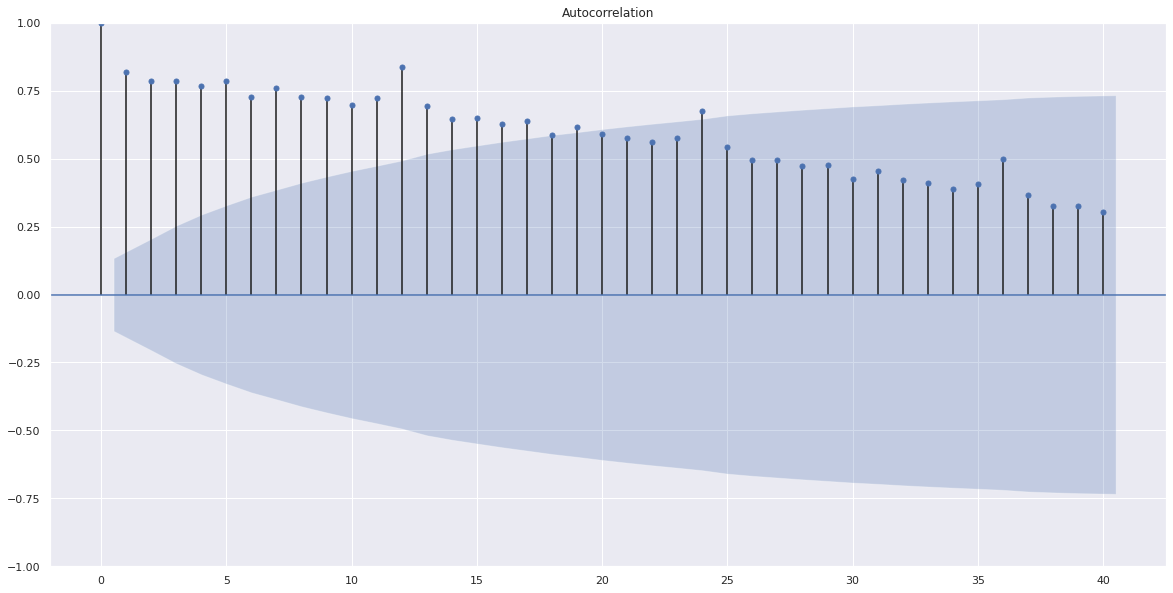

In [128]:
sm.graphics.tsa.plot_acf(residuo_neurais,lags=40)
plt.show()


##Avaliando os dados de treino

In [245]:
metrics_random_treino = evaluate_regression(y_treino,predic_rando_treino, 'Random Forest Regression')
metrics_linear_treino = evaluate_regression(y_treino,predic_treino_lasso, 'Linear Regression')
metrics_grad_treino = evaluate_regression(y_treino,predict_grad_treino, 'Gradiente Boosting Regression')
metrics_redes_treino = evaluate_regression(y_treino,predict_redes_treino, 'Redes Neurais')
metrics_treino = pd.concat([metrics_random_treino, metrics_linear_treino,metrics_grad_treino,metrics_redes_treino])
metrics_treino

,MAE,MSE,RMSE,R²
Random Forest Regression,2.99,15.99,4.00,0.95
Linear Regression,8.04,111.99,10.58,0.68
Gradiente Boosting Regression,0.32,0.87,0.93,1.00
Redes Neurais,41.49,2261.16,47.55,-5.40


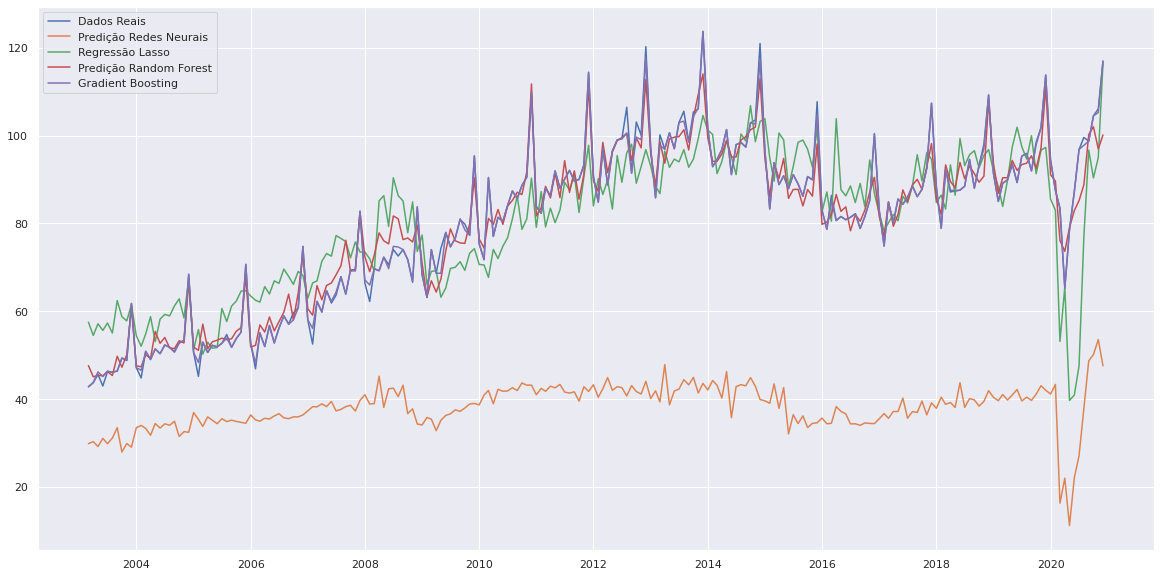

In [131]:
#Plotando as predicoes
plt.plot(treino.index,y_treino,label='Dados Reais')
plt.plot(treino.index,predict_redes_treino,label='Predição Redes Neurais')
plt.plot(treino.index,predic_treino_lasso,label='Regressão Lasso')
plt.plot(treino.index,predic_rando_treino,label='Predição Random Forest')
plt.plot(treino.index,predict_grad_treino,label='Gradient Boosting')
plt.legend();

##Avaliando nos dados de teste

In [132]:
predic_teste_lasso = lasso.predict(x_teste)

In [133]:
predic_rando_teste = rfr.predict(x_teste)

In [134]:
predict_grad_teste = grad_bost.predict(x_teste)

In [267]:
predict_redes_teste = model.predict(x_teste)
predict_redes_teste = np.squeeze(predict_redes_teste)

1/1 [==============================] - 0s 111ms/step


In [268]:
metrics_random_teste = evaluate_regression(y_teste,predic_rando_teste, 'Random Forest Regression')
metrics_linear_teste = evaluate_regression(y_teste,predic_teste_lasso, 'Linear Regression')
metrics_grad_teste = evaluate_regression(y_teste,predict_grad_teste, 'Gradiente Boosting Regression')
metrics_redes_teste = evaluate_regression(y_teste,predict_redes_teste, 'Redes Neurais')
metrics_teste = pd.concat([metrics_random_teste, metrics_linear_teste,metrics_grad_teste,metrics_redes_teste])
metrics_teste

,MAE,MSE,RMSE,R²
Random Forest Regression,21.48,647.24,25.44,-14.08
Linear Regression,25.92,938.29,30.63,-20.86
Gradiente Boosting Regression,20.50,549.25,23.44,-11.80
Redes Neurais,49.65,2580.75,50.80,-59.13


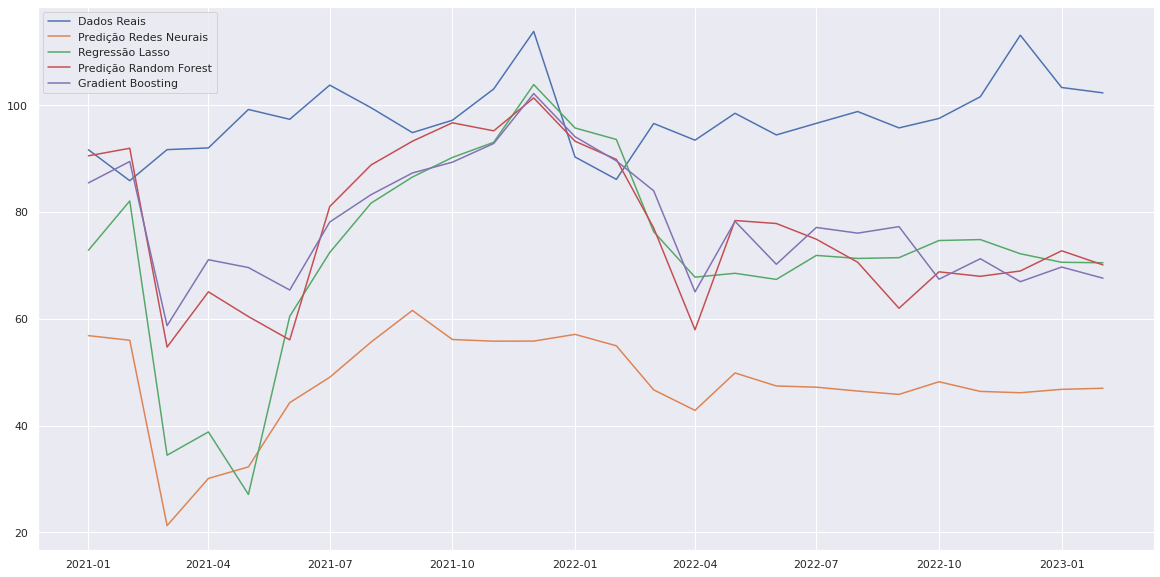

In [269]:
#Plotando as predicoes
plt.plot(teste.index,y_teste,label='Dados Reais')
plt.plot(teste.index,predict_redes_teste,label='Predição Redes Neurais')
plt.plot(teste.index,predic_teste_lasso,label='Regressão Lasso')
plt.plot(teste.index,predic_rando_teste,label='Predição Random Forest')
plt.plot(teste.index,predict_grad_teste,label='Gradient Boosting')
plt.legend();

##Intervalo de previsao

In [172]:
def intervalo_predicao_bootstraps(x_treino,y_treino,modelo_treinado,x_teste,index,predicao,nome_algoritimo,percentiles = [2.5, 97.5],n_bootstraps=1000):
  import numpy as np
  from sklearn.utils import resample

  # Bootstrap
  n_samples = len(x_treino)
  bootstrapped_predictions = np.zeros((n_bootstraps, len(x_teste)))
  
  if nome_algoritimo == 'Redes Neurais':
    for i in range(n_bootstraps):
      bootstrapped_data = resample(np.column_stack((x_treino, y_treino)), replace=True, n_samples=n_samples, random_state=i)
      bootstrapped_x_train, bootstrapped_y_train = bootstrapped_data[:, :-1], bootstrapped_data[:, -1]
      bootstrapped_model = modelo_treinado.fit(bootstrapped_x_train, bootstrapped_y_train, epochs=100,batch_size=100,verbose=0)
      bootstrapped_predictions[i] = np.squeeze(model.predict(x_teste))
  else:
    for i in range(n_bootstraps):
      bootstrapped_data = resample(np.column_stack((x_treino, y_treino)), replace=True, n_samples=n_samples, random_state=i)
      bootstrapped_x_train, bootstrapped_y_train = bootstrapped_data[:, :-1], bootstrapped_data[:, -1]
      bootstrapped_model = modelo_treinado.fit(bootstrapped_x_train, bootstrapped_y_train)
      bootstrapped_predictions[i] = bootstrapped_model.predict(x_teste)

  # Calcula intervalos de previsão
  lower = np.percentile(bootstrapped_predictions, percentiles[0], axis=0)
  upper = np.percentile(bootstrapped_predictions, percentiles[1], axis=0)

  intervalos = pd.DataFrame(index=index)
  intervalos['Predicao'] = predicao
  intervalos[f'lower({percentiles[0]})'] = lower
  intervalos[f'upper({percentiles[1]})'] = upper

  import matplotlib.pyplot as plt

  plt.plot(index,predicao,'*')
  plt.fill_between(index,lower, upper, color='gray', alpha=0.5, label=f'Intervalo de confiança de {percentiles[1]-percentiles[0]}%')
  plt.legend()
  plt.xlabel('Datas')
  plt.ylabel('Predição')
  plt.title('Previsões com intervalo de confiança para a'+' '+nome_algoritimo)
  plt.show()
  return intervalos

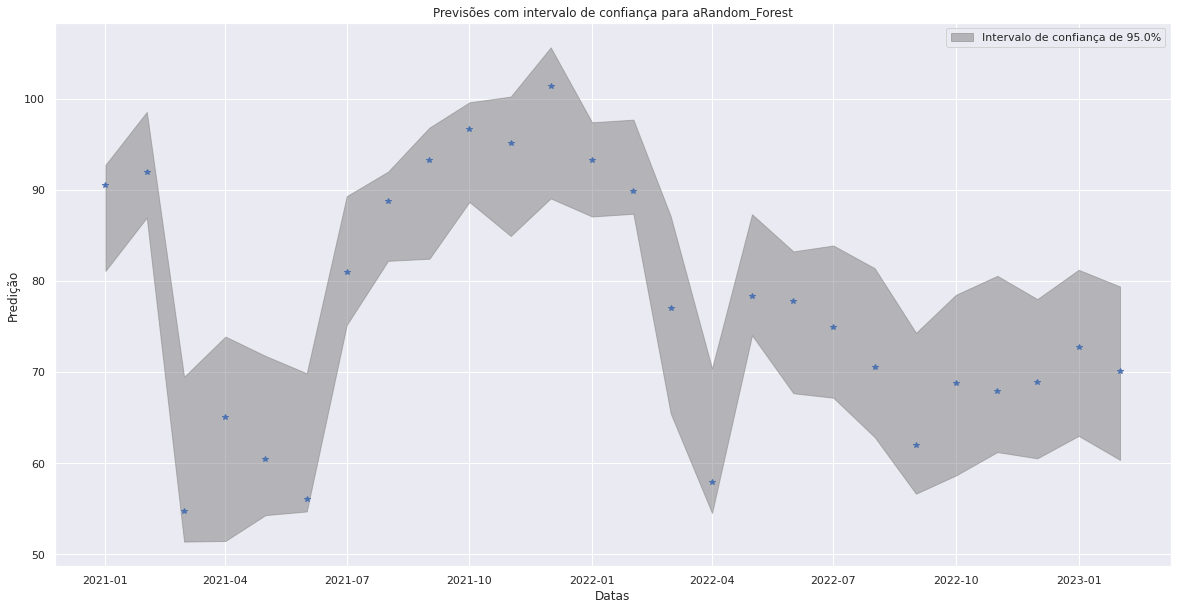

In [162]:
intervalo_random = intervalo_predicao_bootstraps(x_treino,y_treino,rfr,x_teste,teste.index,predic_rando_teste,'Random_Forest')

In [163]:
intervalo_random

,Predicao,lower(2.5),upper(97.5)
2021-01-01,90.51,81.10,92.74
2021-02-01,91.92,86.96,98.56
2021-03-01,54.69,51.37,69.46
2021-04-01,65.03,51.44,73.89
2021-05-01,60.40,54.28,71.77
2021-06-01,56.04,54.68,69.85
2021-07-01,81.00,75.16,89.31
2021-08-01,88.80,82.21,92.00
2021-09-01,93.24,82.43,96.83
2021-10-01,96.69,88.67,99.61


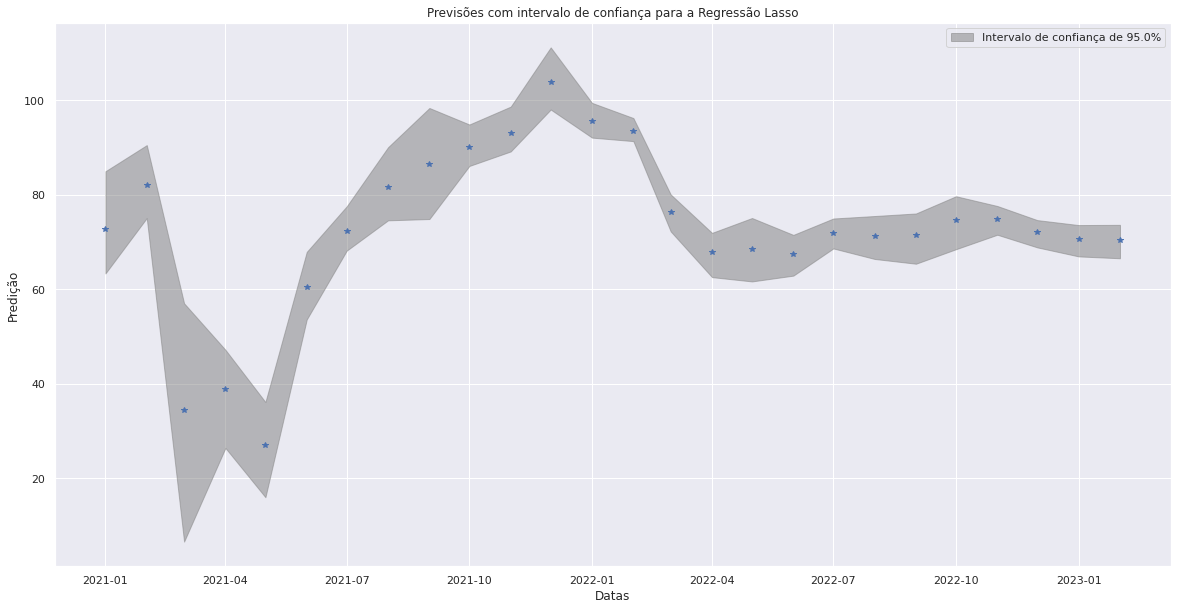

In [167]:
intervalo_lasso = intervalo_predicao_bootstraps(x_treino,y_treino,lasso,x_teste,teste.index,predic_teste_lasso,'Regressão Lasso')

In [168]:
intervalo_lasso

,Predicao,lower(2.5),upper(97.5)
2021-01-01,72.82,63.34,84.99
2021-02-01,82.05,75.08,90.54
2021-03-01,34.43,6.54,57.03
2021-04-01,38.80,26.37,47.18
2021-05-01,27.10,15.94,36.11
2021-06-01,60.44,53.59,67.91
2021-07-01,72.40,68.18,77.57
2021-08-01,81.65,74.60,90.09
2021-09-01,86.53,74.87,98.40
2021-10-01,90.20,86.12,94.90


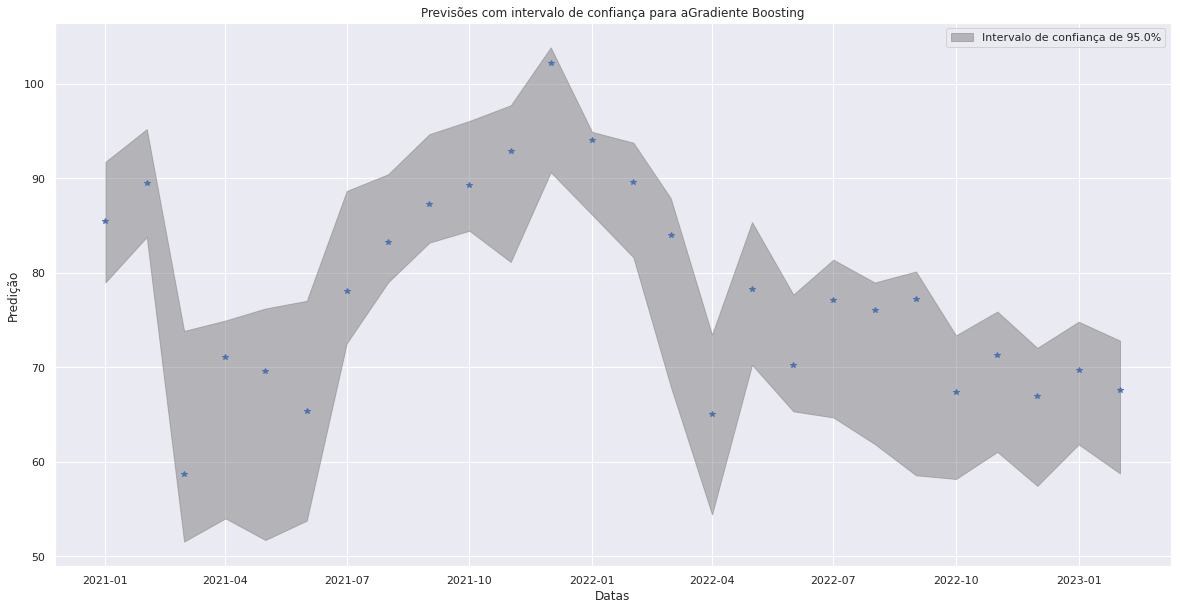

In [144]:
intervalo_grad = intervalo_predicao_bootstraps(x_treino,y_treino,grad_bost,x_teste,teste.index,predict_grad_teste,'Gradiente Boosting',n_bootstraps=100)

In [145]:
intervalo_grad

,Predicao,lower(2.5),upper(97.5)
2021-01-01,85.44,78.97,91.73
2021-02-01,89.45,83.78,95.19
2021-03-01,58.70,51.54,73.84
2021-04-01,71.05,54.00,74.93
2021-05-01,69.58,51.71,76.21
2021-06-01,65.37,53.76,77.03
2021-07-01,78.11,72.53,88.65
2021-08-01,83.23,78.97,90.41
2021-09-01,87.29,83.18,94.66
2021-10-01,89.32,84.44,96.05


1/1 [==============================] - 0s 39ms/step


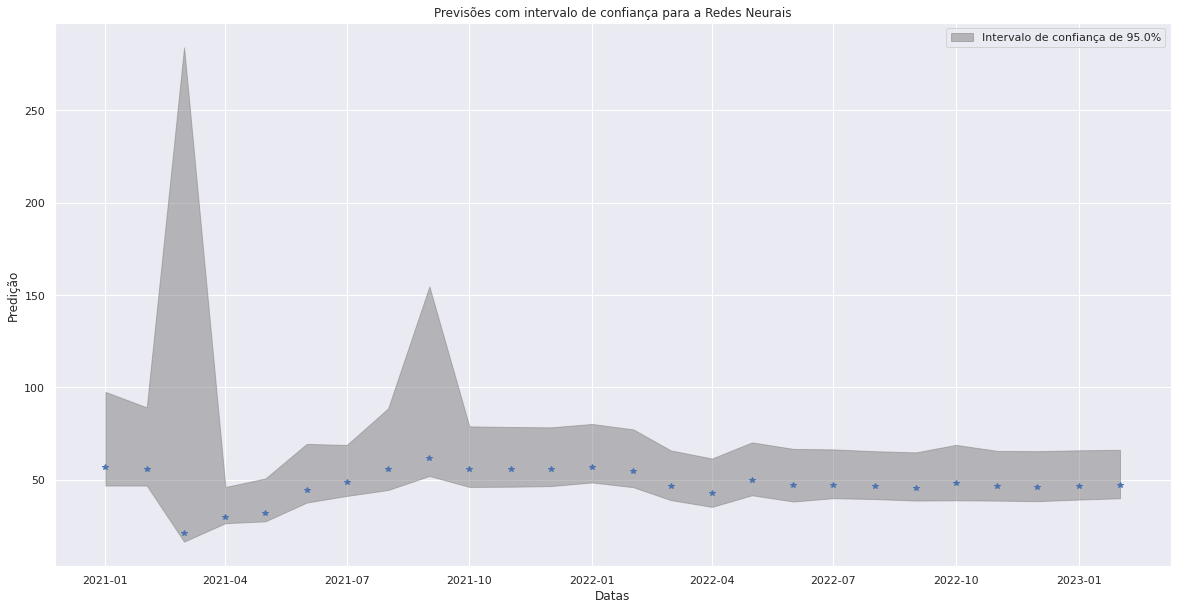

In [270]:
intervalo_redes = intervalo_predicao_bootstraps(x_treino,y_treino,model,x_teste,teste.index,predict_redes_teste,'Redes Neurais',n_bootstraps=50)

In [271]:
intervalo_redes

,Predicao,lower(2.5),upper(97.5)
2021-01-01,56.83,46.91,97.62
2021-02-01,55.97,46.89,89.24
2021-03-01,21.25,16.55,284.16
2021-04-01,30.09,26.52,46.12
2021-05-01,32.25,27.52,50.74
2021-06-01,44.28,37.69,69.48
2021-07-01,49.03,41.27,68.86
2021-08-01,55.62,44.48,88.63
2021-09-01,61.55,52.09,154.68
2021-10-01,56.10,46.14,78.94
